https://twitter.com/MariosRichards/status/1265561037509660680

In [1]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')



Toggle code

var_type (7911, 14)
Wall time: 27.1 s


In [2]:
# BES_Panel["countryOfBirth"]
countryOfBirth = BES_Panel["countryOfBirth"]

In [3]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()

In [4]:
BES_Panel["countryOfBirth"] = countryOfBirth

In [11]:
# search(BES_Panel,"house|al_scale|lr_scale").sort_index()

In [4]:
# BES_Panel["profile_house_tenureW16"].value_counts()

In [3]:
# df = BES_Panel[["al_scaleW16","lr_scaleW16","profile_house_tenureW16"]]

In [5]:
def weighted_mean(x):
    if x.empty:
        return np.nan    
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

import numba

def weighted_mean_bstrap(x,size):
    if x.empty:
        return np.nan
    val, weight = map(np.asarray, zip(*x))
    return wt_mean(val,weight,size)

@numba.jit
def wt_mean(val, weight,size):
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]

    bs_reps = np.empty(size)

    # Draw replicates
    n = len(val)
    for i in range(size):
        ind = np.random.choice(range(0,n), size=n)
        bs_reps[i] = (val[ind] * weight[ind]).sum() / weight[ind].sum()
        
    return bs_reps

def wt_err(x,size,conf_int = [2.5,97.5]):
    lower,upper = np.percentile( weighted_mean_bstrap(x,size) , conf_int)
    return (lower,upper)

In [6]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
# points = [(0.1*i, np.sin(0.1*i)) for i in range(100)]
# hv.Curve(points)

In [23]:
# df[df["al_scaleW17"]<5].groupby("p_socgradeW17")["lr_scaleW17"].mean()

In [24]:
# df[df["al_scaleW17"]>5].groupby("p_socgradeW17")["lr_scaleW17"].mean()

In [6]:
# df["al_scaleW17"].hist(bins=100)

In [7]:
# df["lr_scaleW17"].hist(bins=100)

In [8]:
# BES_Panel["p_socgradeW19"]

In [12]:
# df["p_socgradeW17"]

In [52]:
# df["p_socgradeW17_num"] = df["p_socgradeW17"].replace("Unknown",np.nan).cat.codes.replace(-1,np.nan)

In [17]:
# mask = df["lr_scaleW17"].notnull() & df["wt_new_W17"].notnull()
# df["lr_scaleW17_wts"] = list(zip(df["lr_scaleW17"],df["wt_new_W17"]))

In [13]:
# df["lr_scaleW17_wts"]

In [14]:
# %%time
# ax = sns.regplot(x="p_socgradeW17_num", y="lr_scaleW17_wts", data=df,
#                  x_estimator=weighted_mean)

In [15]:
# sns.bootstrap(df["lr_scaleW17_wts"],n_boot=10,axis=1,func=weighted_mean)

In [16]:
# import dc_stat_think as dcst

In [17]:
# %%time
# _ = dcst.draw_bs_reps(df["lr_scaleW17_wts"][mask], weighted_mean, size=10);

In [18]:
# %debug

In [19]:
# tips = sns.load_dataset("tips")
# ax = sns.regplot(x="size", y="total_bill", data=tips,
#                  x_estimator=np.mean)


In [27]:
# df["lr_scaleW17_wts"].sample(replace=True,frac=1)

In [20]:
# %%time
# means = weighted_mean_bstrap(df["lr_scaleW17_wts"],1000)
# pd.Series(means).hist()

In [21]:
#  wt_err(df["lr_scaleW17_wts"],1000)

In [33]:
df[df["al_scaleW17"]>5].groupby("p_socgradeW17")["lr_scaleW17_wts"].agg(weighted_mean)

p_socgradeW17
A          7.891044
B          7.216304
C1         6.806446
C2         6.186249
D          5.762544
E          5.672429
Unknown    6.160874
Name: lr_scaleW17_wts, dtype: float64

In [34]:
df[df["al_scaleW17"]<5].groupby("p_socgradeW17")["lr_scaleW17_wts"].agg(weighted_mean)

p_socgradeW17
A           4.709435
B           3.875043
C1          3.572036
C2          3.144618
D           3.792718
E           4.023924
Unknown    11.809185
Name: lr_scaleW17_wts, dtype: float64

In [22]:
# df["al_scaleW17"].value_counts().sort_index()

In [252]:
# from holoviews import dim
# hv_dict = {}

# for al_var in range(0,21):
#     mask = df["al_scaleW17"]==al_var
#     means = df[mask].groupby("p_socgradeW17")["lr_scaleW17_wts"].agg(weighted_mean)
#     wt_mean_errors = df[mask].groupby("p_socgradeW17")["lr_scaleW17_wts"].agg(wt_err, size=1000)
#     lower = wt_mean_errors.apply(lambda x: x[0])
#     upper = wt_mean_errors.apply(lambda x: x[1])
#     count = df[df["al_scaleW17"]<5].groupby("p_socgradeW17")["lr_scaleW17_wts"].count()

#     chart_df = pd.DataFrame()
#     chart_df["means"]=means
#     chart_df["lower_error"]=lower
#     chart_df["upper_error"]=upper
#     chart_df["N"]=count
#     chart_df

#     chart_df = chart_df.reset_index()
#     chart_df["p_socgradeW17"] = chart_df["p_socgradeW17"].cat.codes
#     chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
#     chart_df["lower_error"] = chart_df["lower_error"].abs()

#     chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])
#     chart.opts(ylim=(0,20),
#               xticks= [(x,df["p_socgradeW17"].cat.categories[x]) for x in range(0,len(df["p_socgradeW17"].cat.categories))])
    
#     hv_dict[al_var] = chart

# hv.output(backend='matplotlib',fig='png', holomap='widgets')    
# hm = hv.HoloMap(hv_dict, kdims=['al_var'])
# hm

Wall time: 33.8 s


:HoloMap   [al_var]
   :Overlay
      .Curve.I     :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
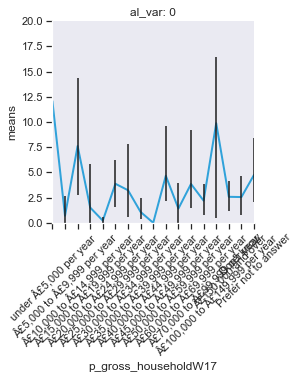
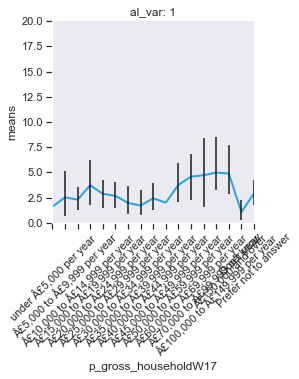
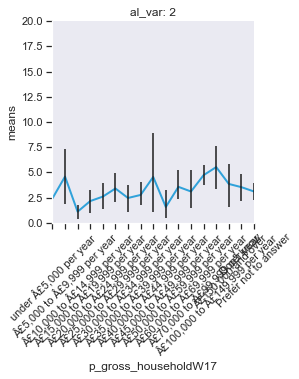
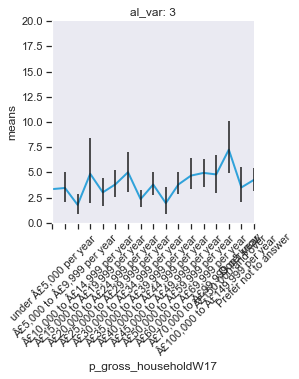
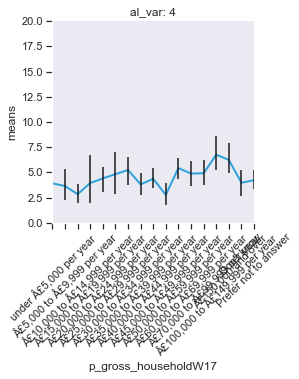
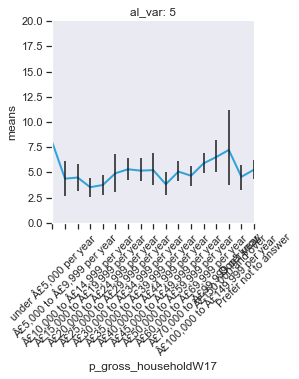
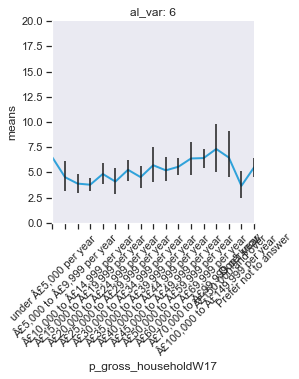
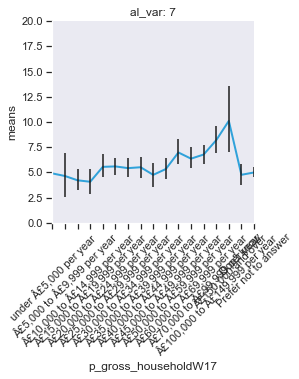
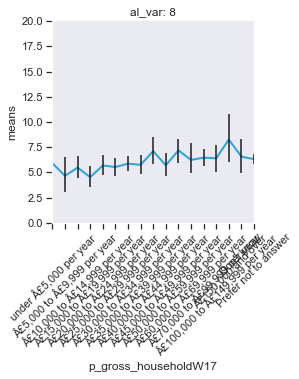
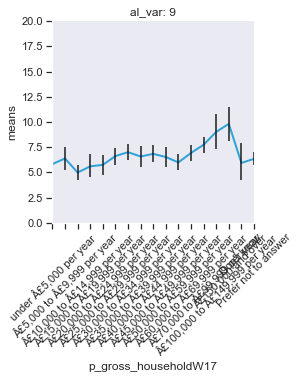
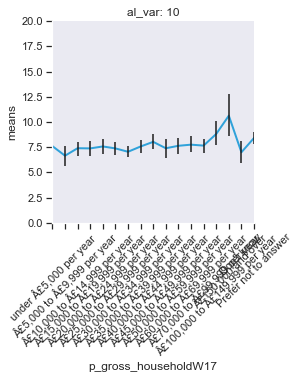
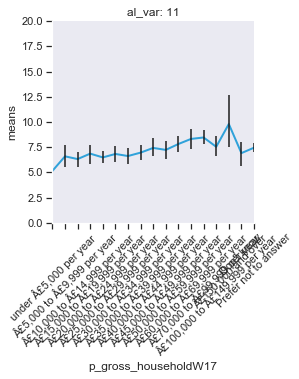
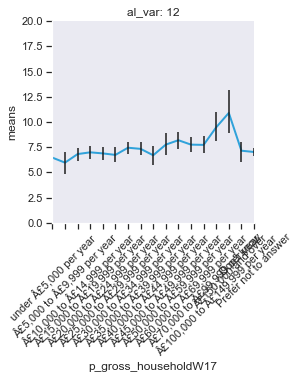
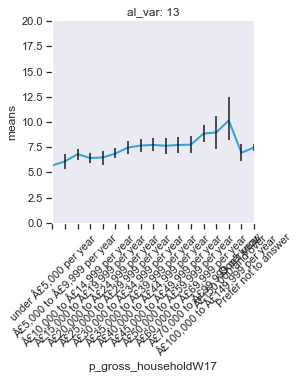
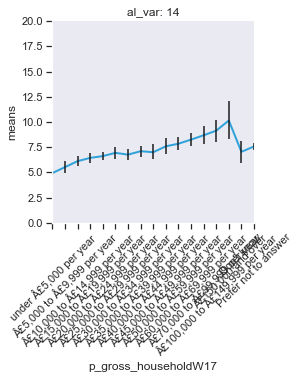
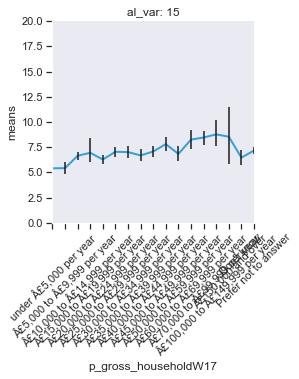
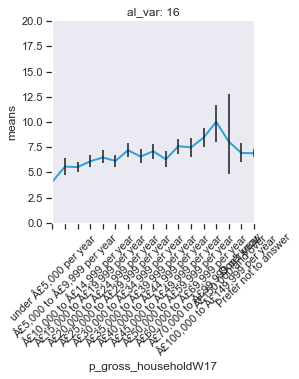
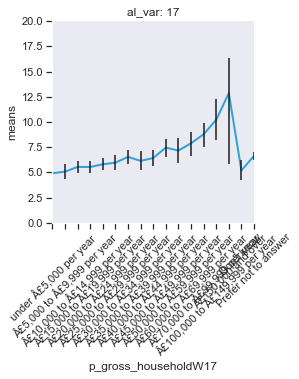
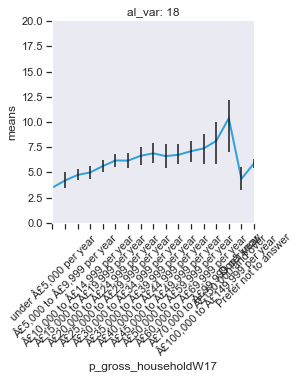
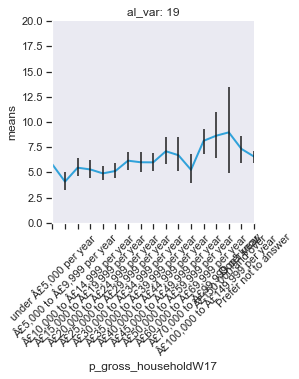
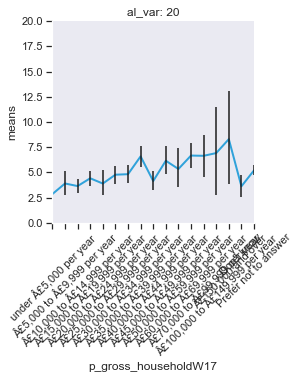

In [107]:
%%time
from holoviews import dim
hv_dict = {}



al_var_name="al_scaleW17"
x_var_name = "p_gross_householdW17"
y_var_name = "lr_scaleW17"

df = BES_Panel[[al_var_name,y_var_name,x_var_name,"wt_new_W17"]]
df[y_var_name] = df[y_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df["wt_new_W17"]))


for al_var in range(0,21):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
    chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])
    chart.opts(ylim=(0,20),
              xticks= [(x,df[x_var_name].cat.categories[x]) for x in range(0,len(df[x_var_name].cat.categories))],
              xrotation=45)
    
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=['al_var'])
hm

Wall time: 33.9 s


:HoloMap   [al_var]
   :Overlay
      .Curve.I     :Curve   [p_gross_personalW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_gross_personalW17]   (means,lower_error,upper_error)
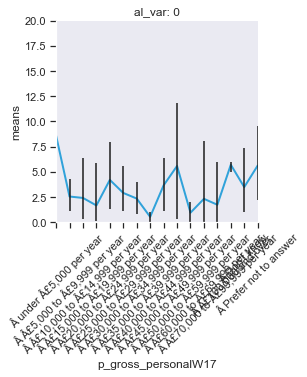
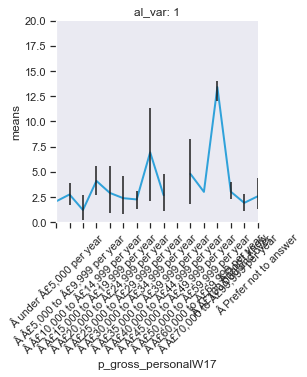
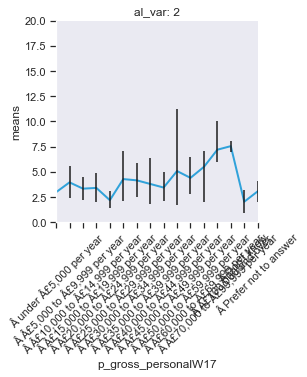
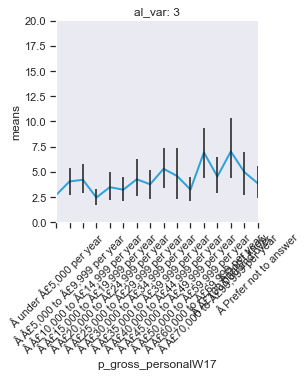
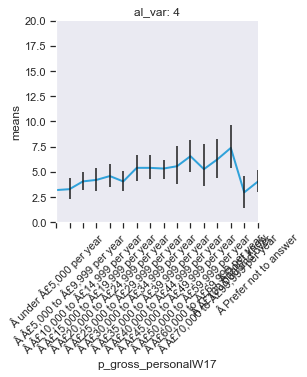
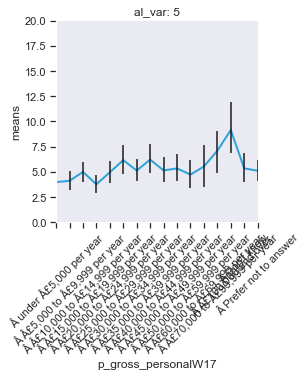
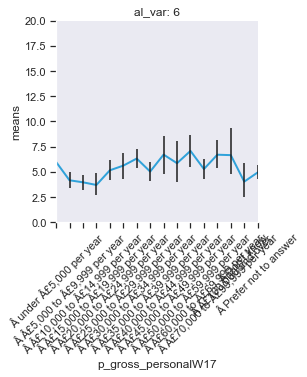
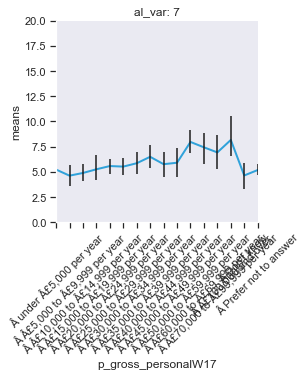
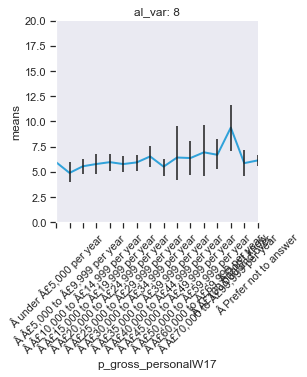
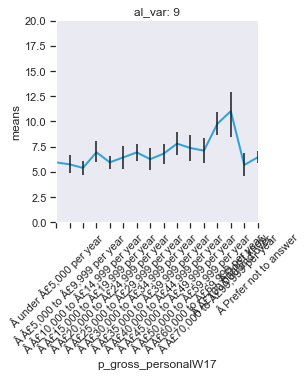
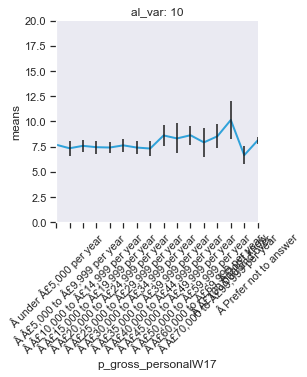
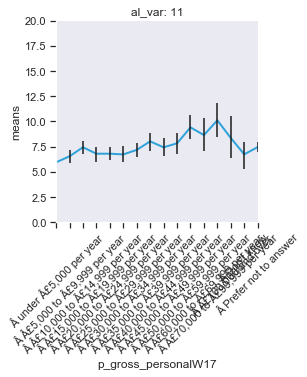
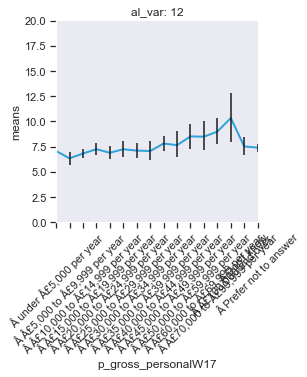
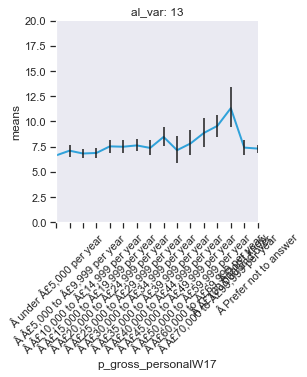
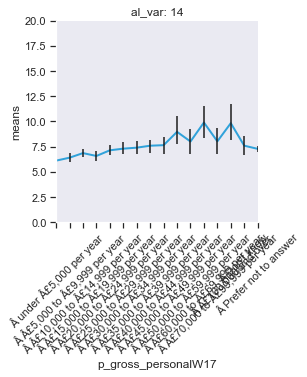
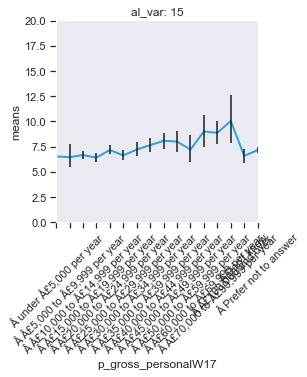
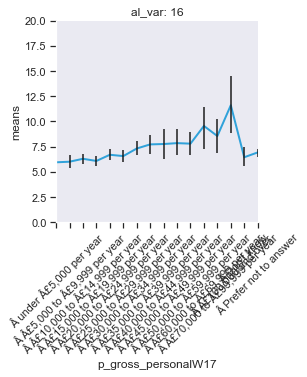
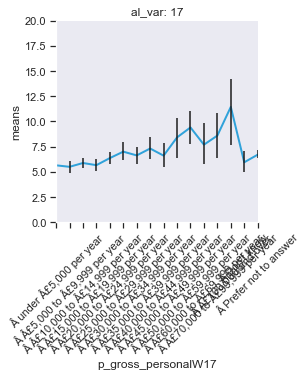
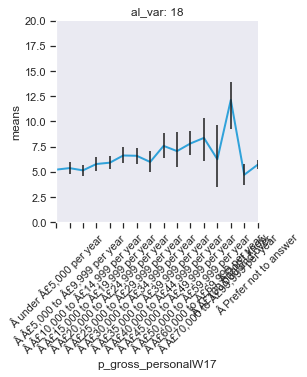
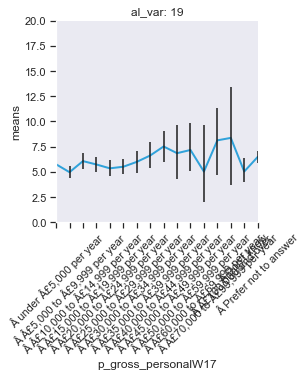
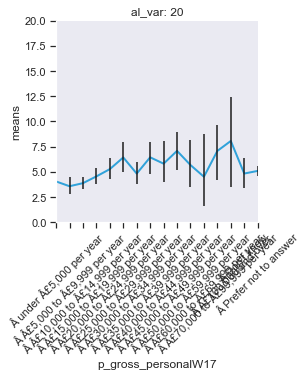

In [110]:
%%time
from holoviews import dim
hv_dict = {}



al_var_name="al_scaleW17"
x_var_name = "p_gross_personalW17"
y_var_name = "lr_scaleW17"

df = BES_Panel[[al_var_name,y_var_name,x_var_name,"wt_new_W17"]]
df[y_var_name] = df[y_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df["wt_new_W17"]))


for al_var in range(0,21):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
    chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])
    chart.opts(ylim=(0,20),
              xticks= [(x,df[x_var_name].cat.categories[x]) for x in range(0,len(df[x_var_name].cat.categories))],
              xrotation=45)
    
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=['al_var'])
hm

Wall time: 20.6 s


:HoloMap   [al_var]
   :Overlay
      .Curve.I     :Curve   [p_housingW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_housingW17]   (means,lower_error,upper_error)
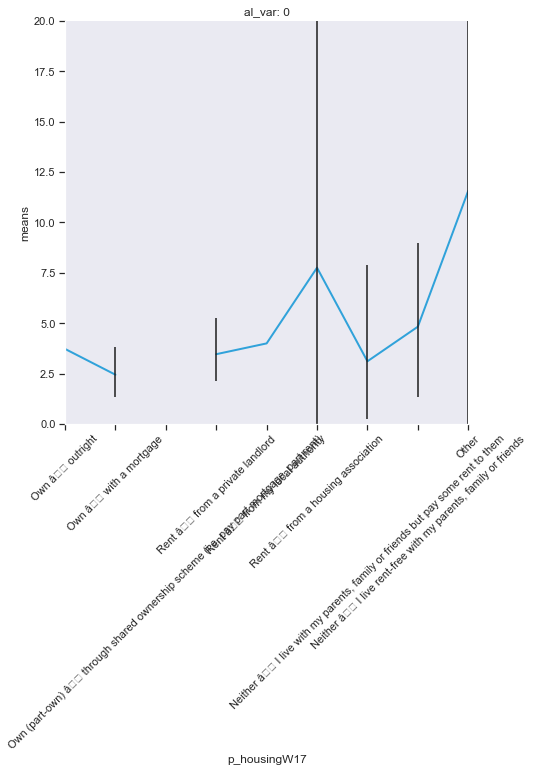
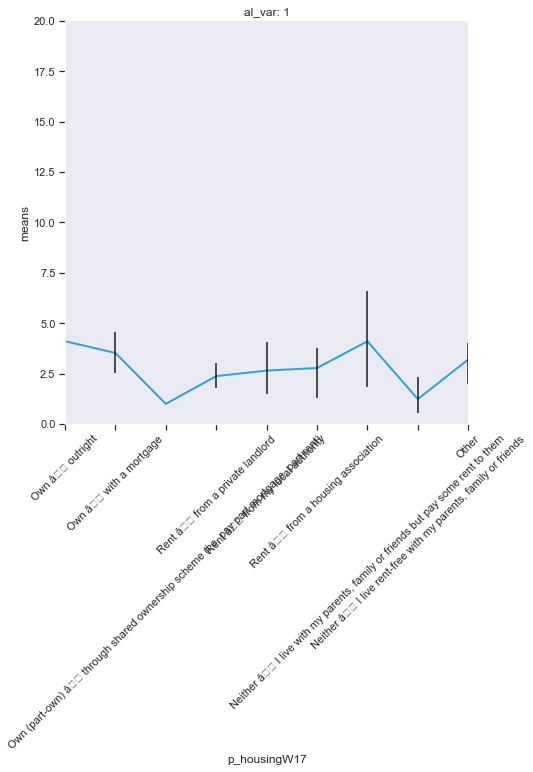
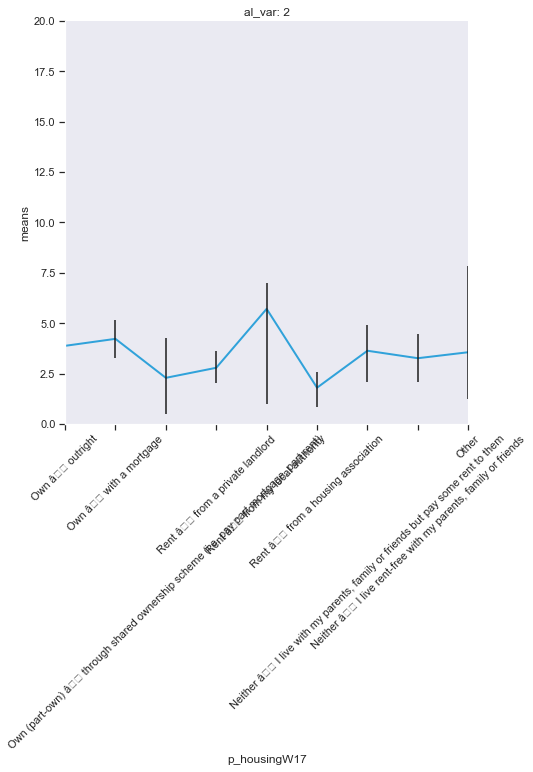
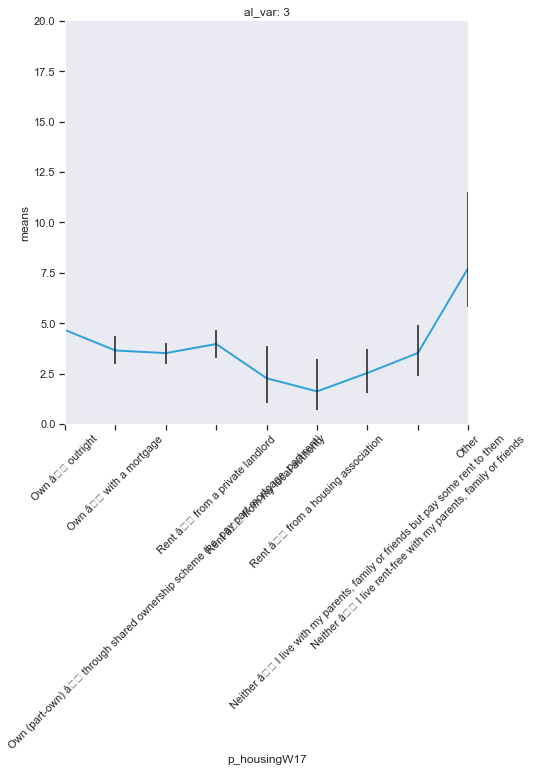
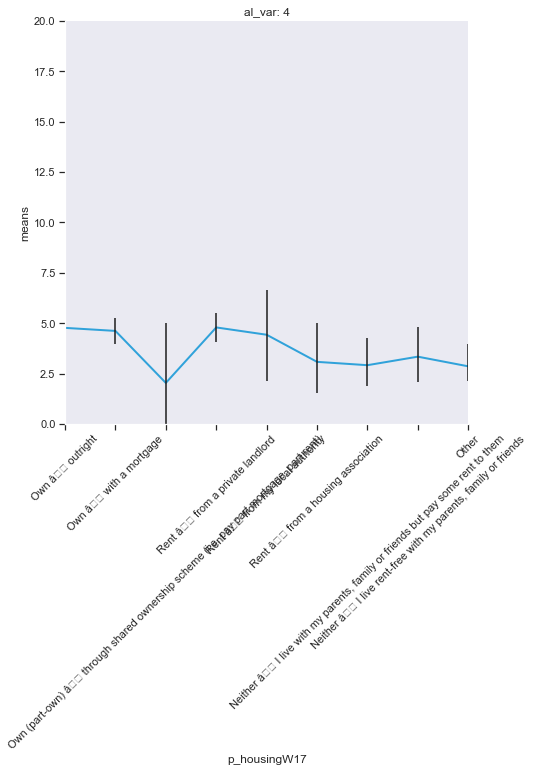
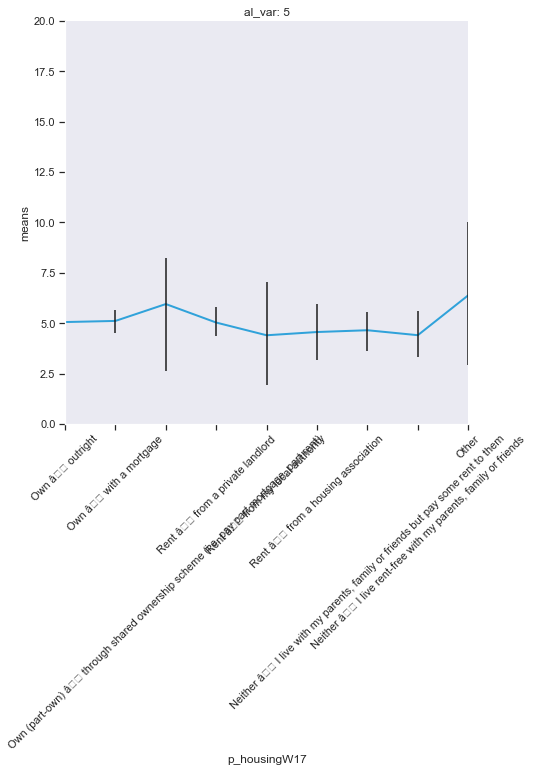
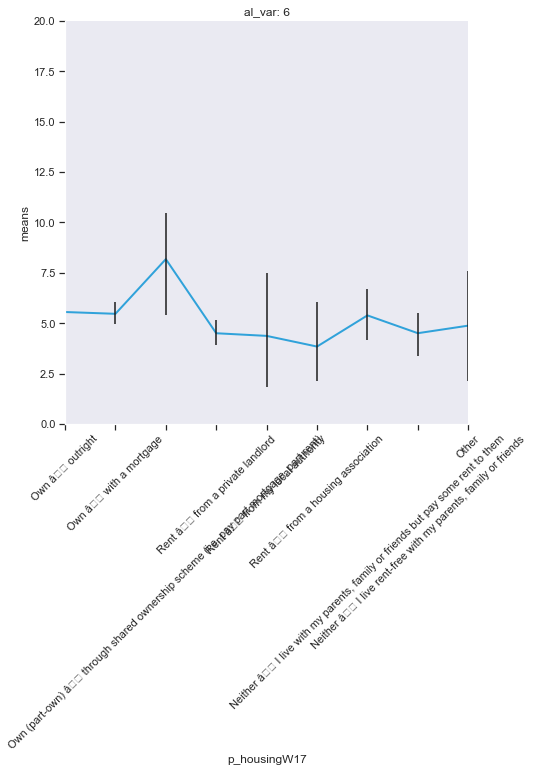
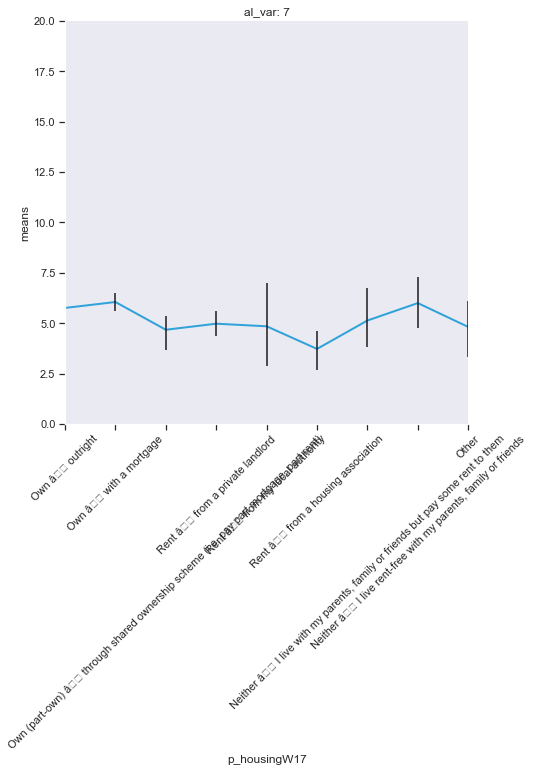
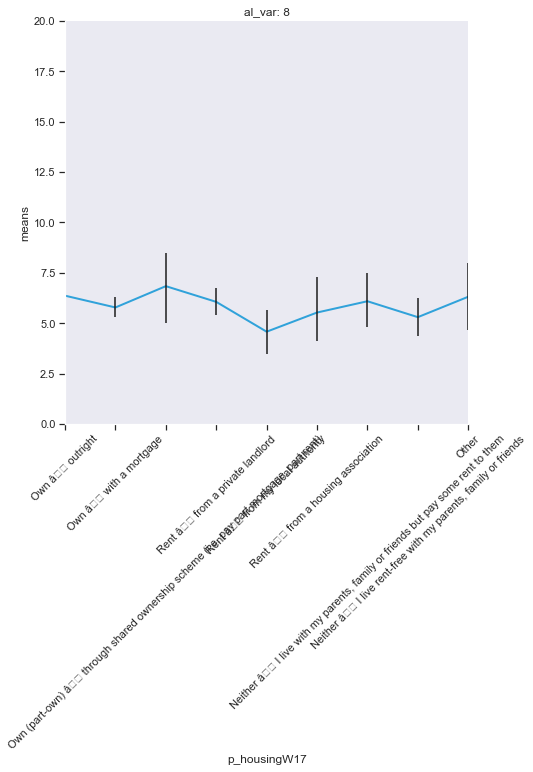
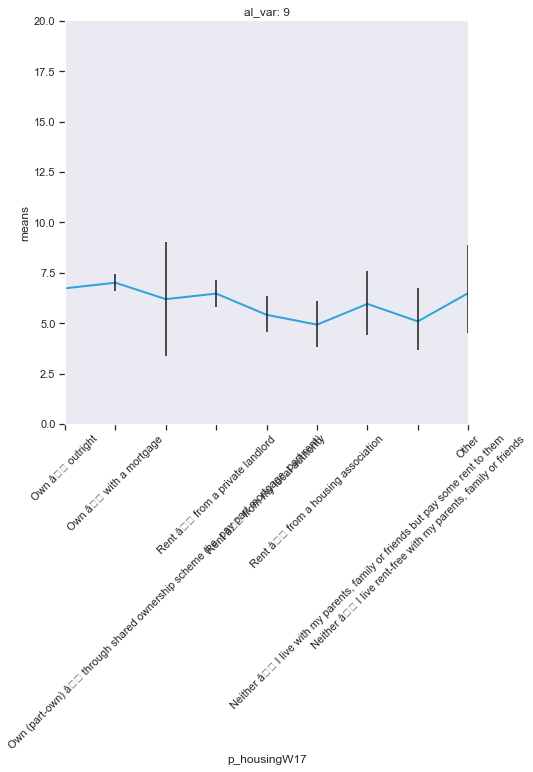
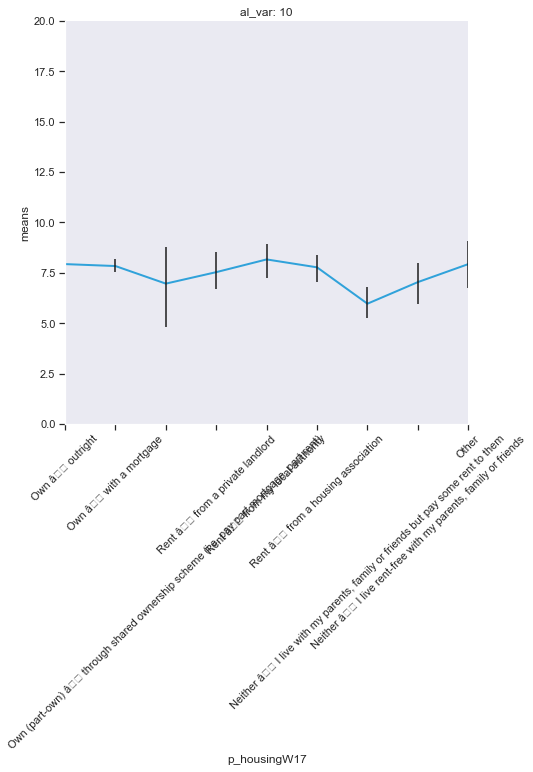
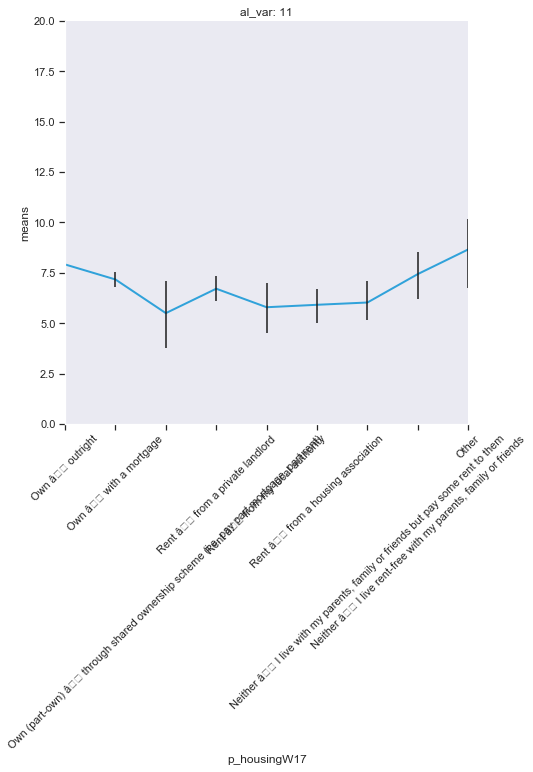
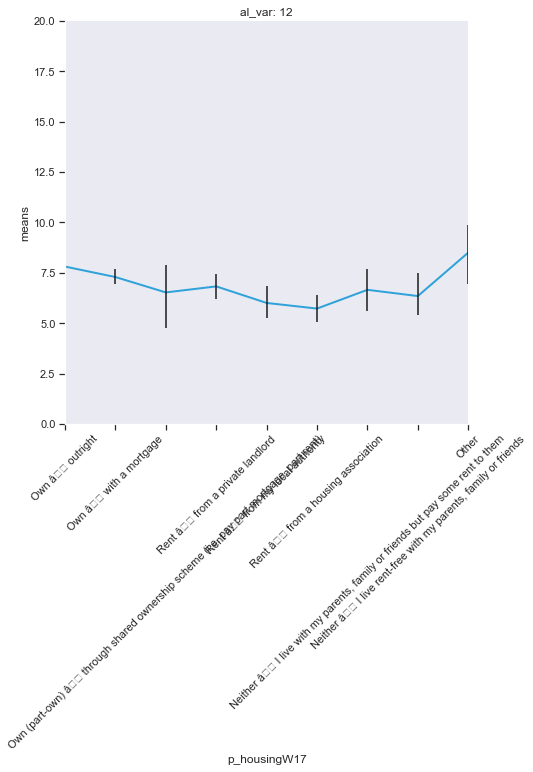
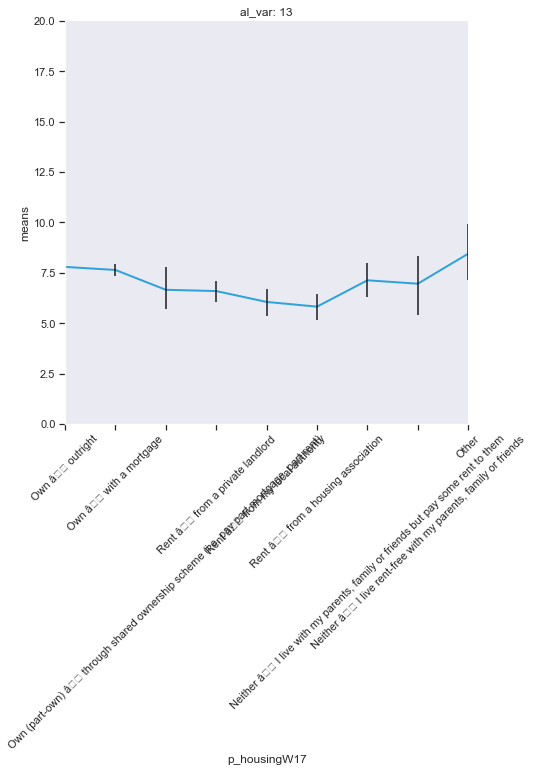
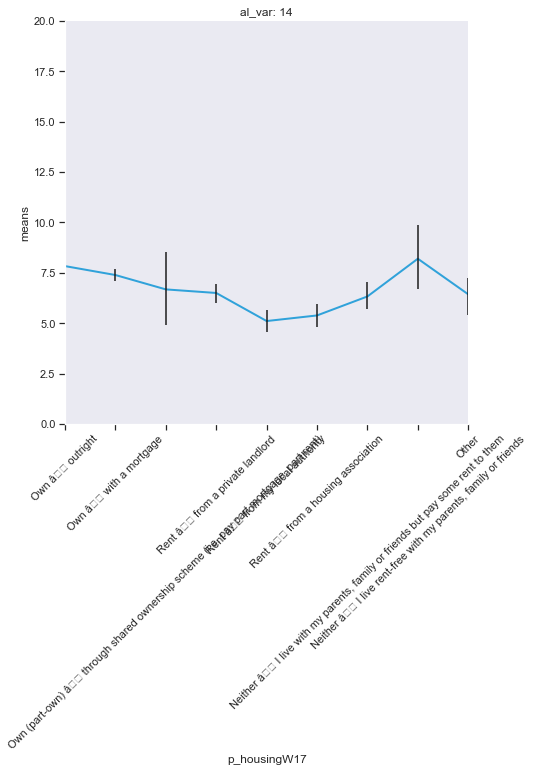
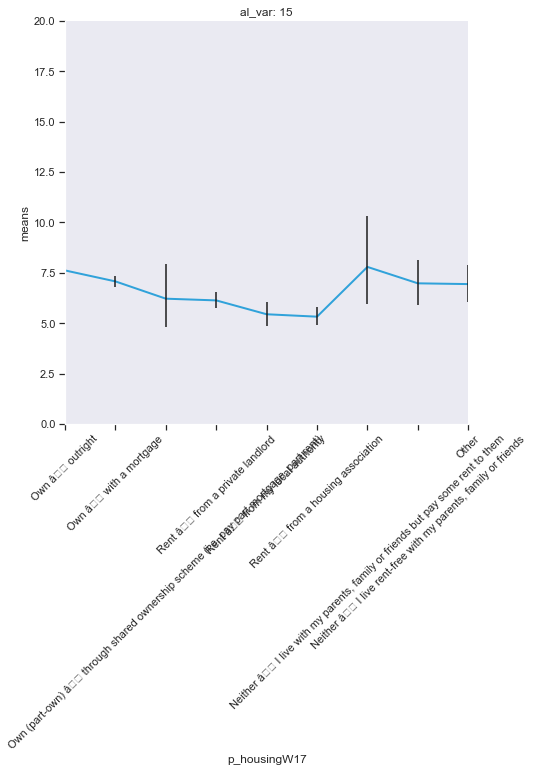
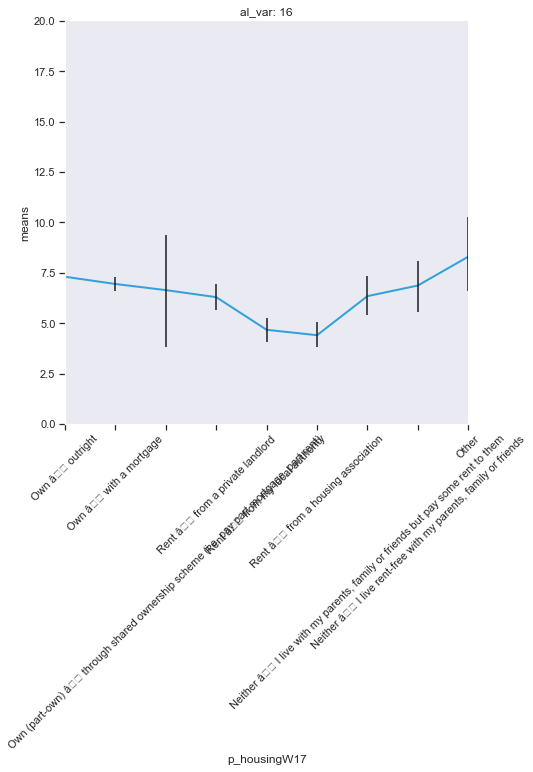
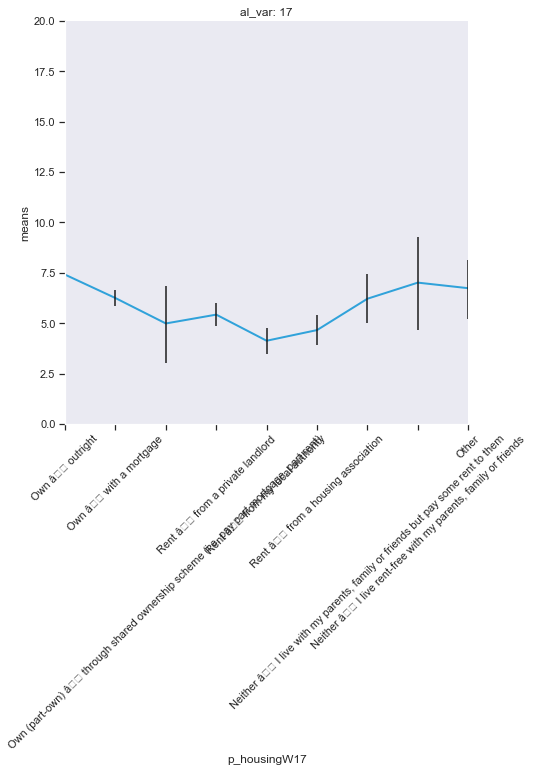
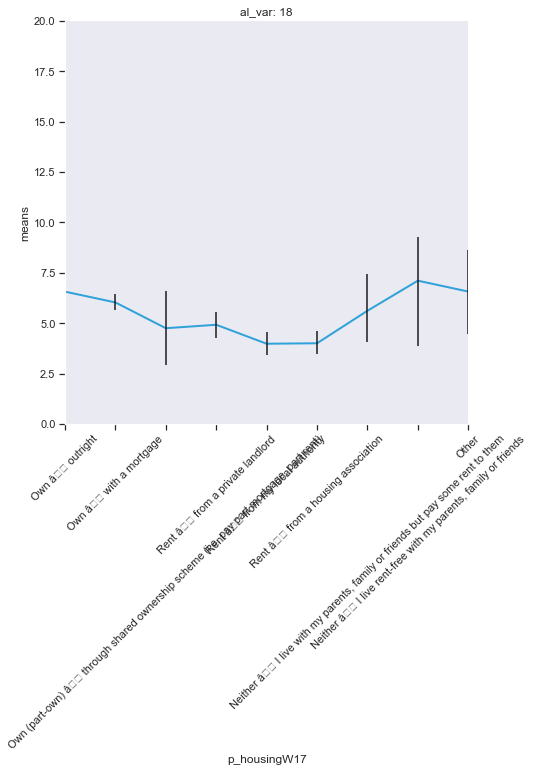
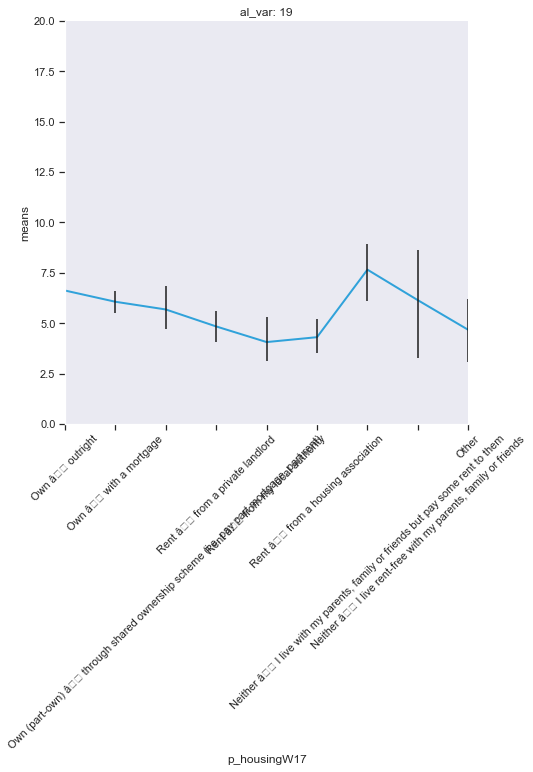
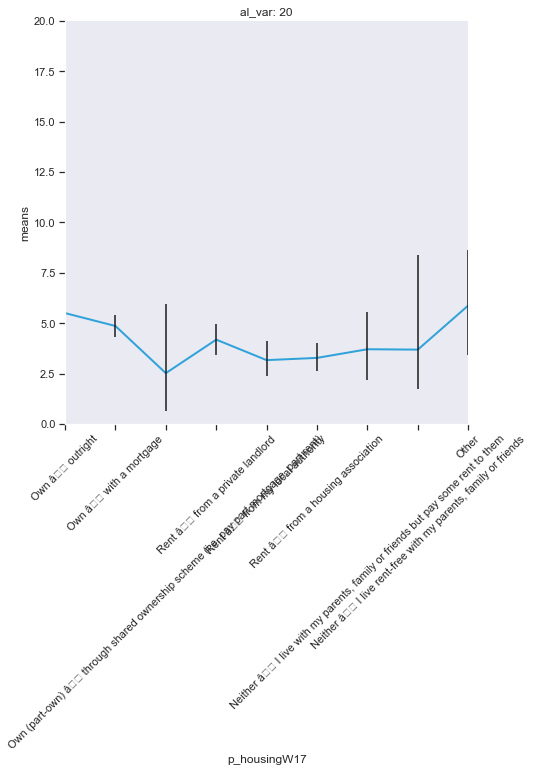

In [113]:
%%time
from holoviews import dim
hv_dict = {}



al_var_name="al_scaleW17"
x_var_name = "p_housingW17"
y_var_name = "lr_scaleW17"

df = BES_Panel[[al_var_name,y_var_name,x_var_name,"wt_new_W17"]]
df[y_var_name] = df[y_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df["wt_new_W17"]))


for al_var in range(0,21):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
    chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])
    chart.opts(ylim=(0,20),
              xticks= [(x,df[x_var_name].cat.categories[x]) for x in range(0,len(df[x_var_name].cat.categories))],
              xrotation=45,fig_size=200)
    
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=['al_var'])
hm

Wall time: 33.5 s


:HoloMap   [al_var]
   :Overlay
      .Curve.I     :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
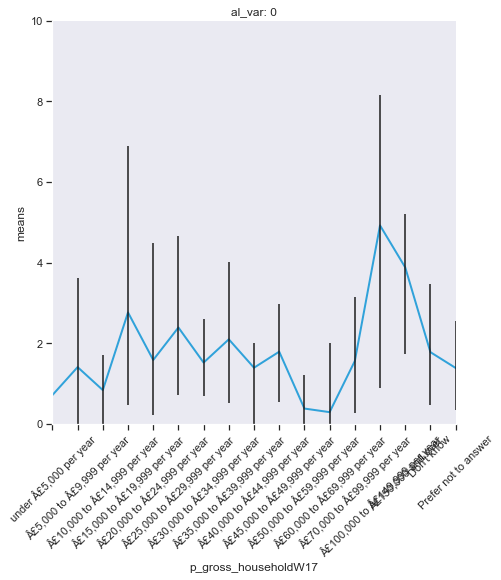
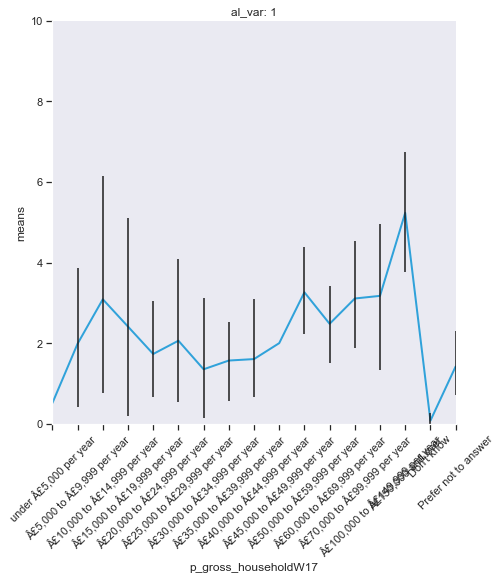
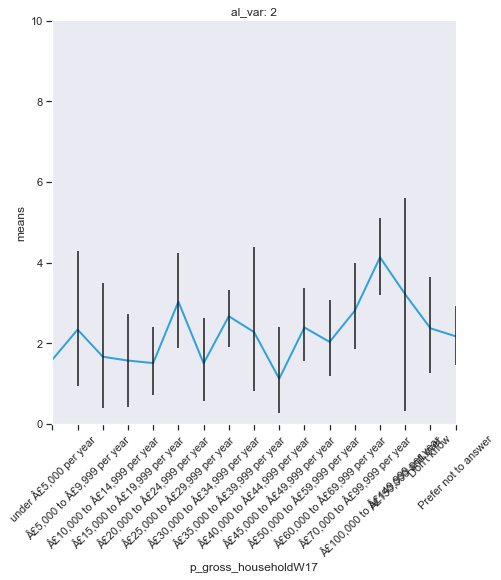
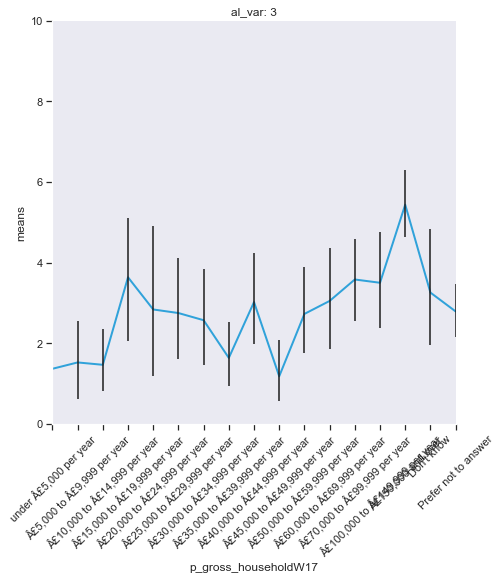
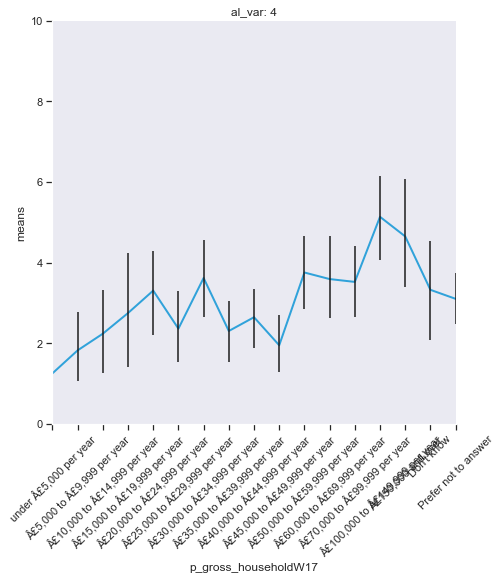
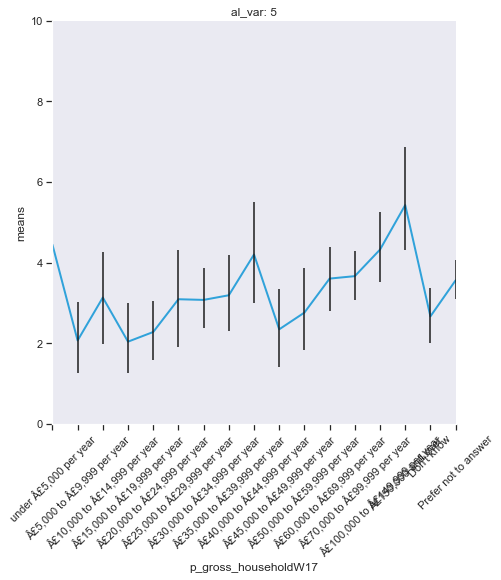
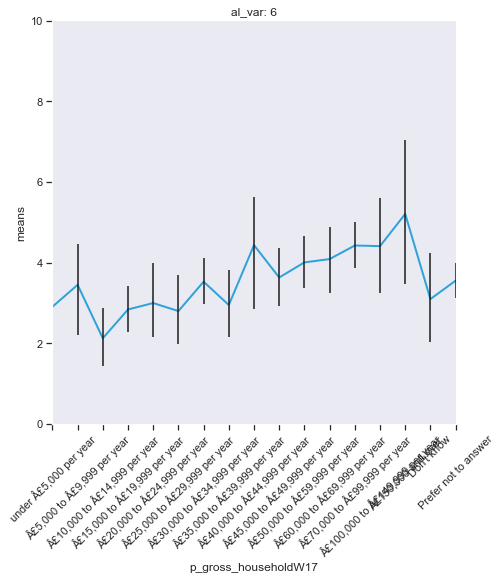
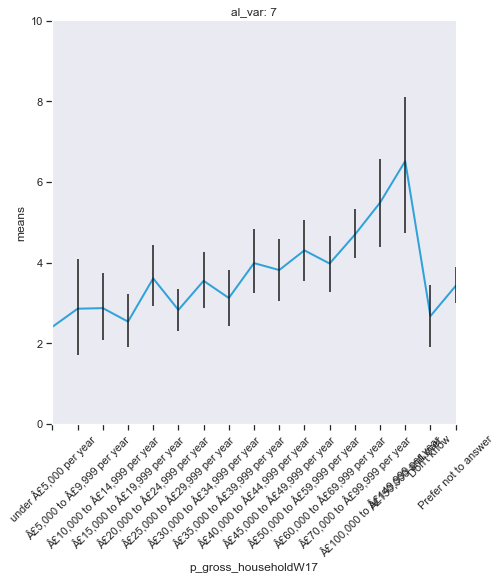
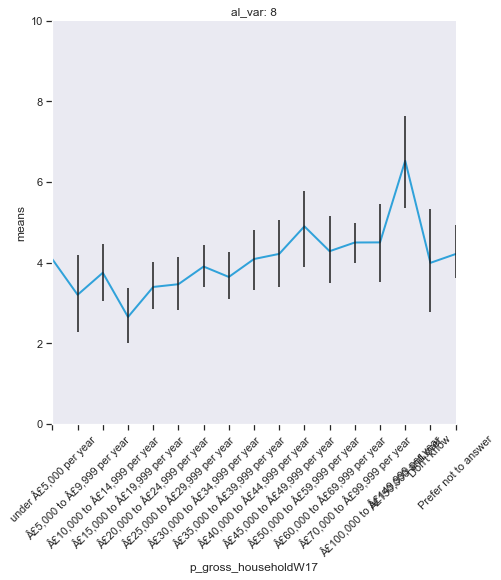
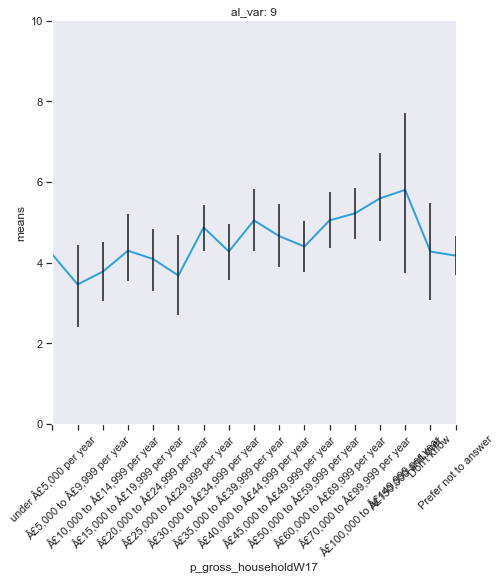
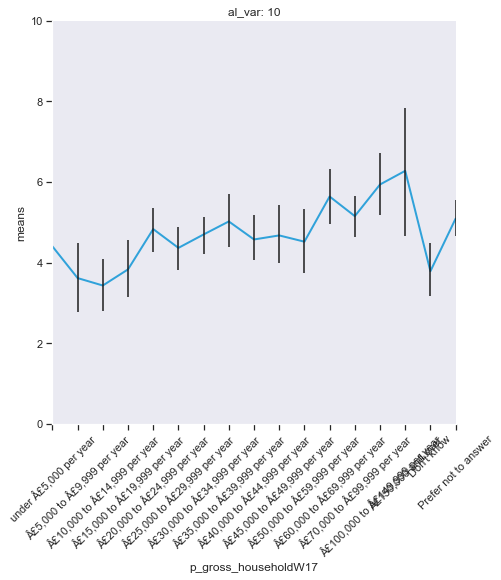
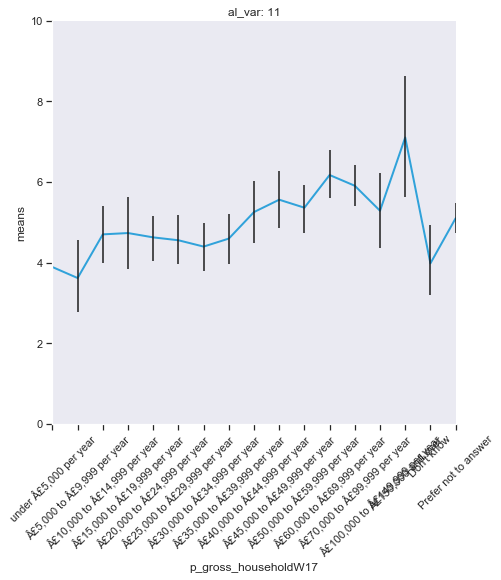
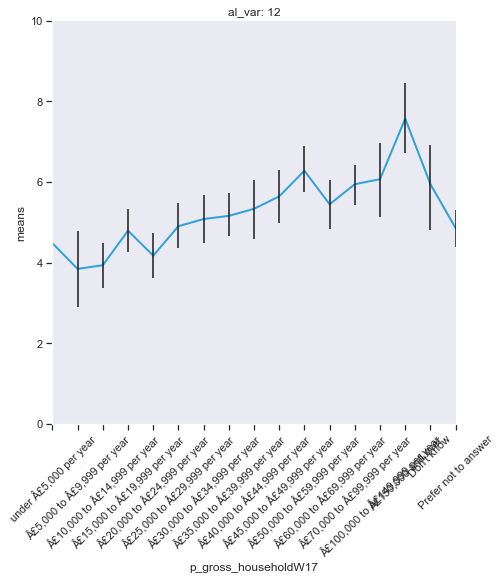
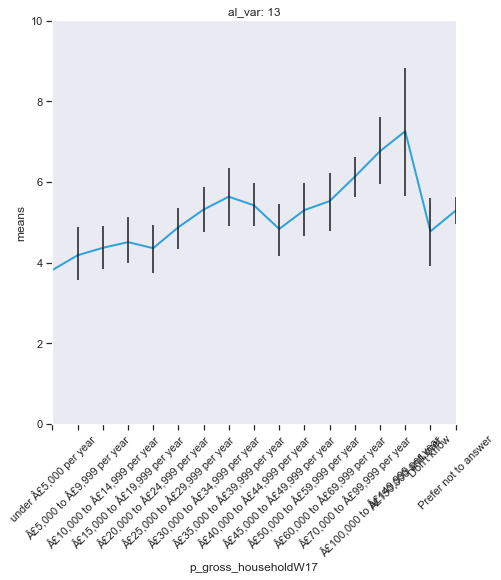
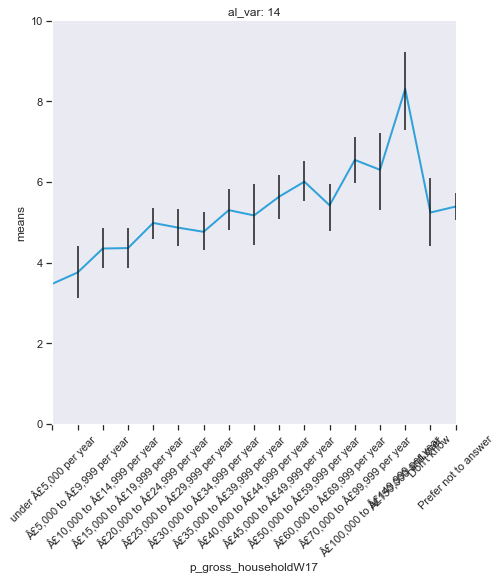
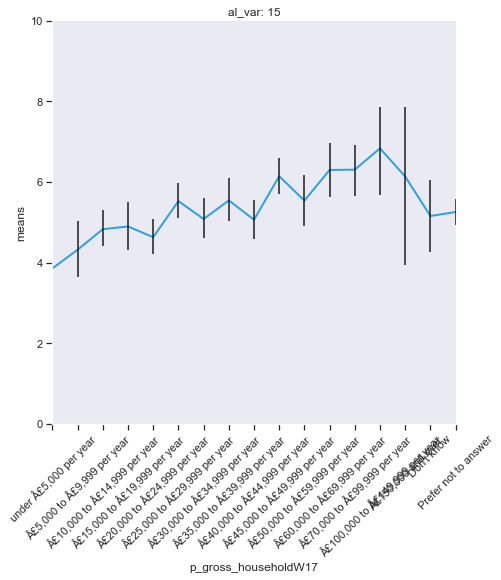
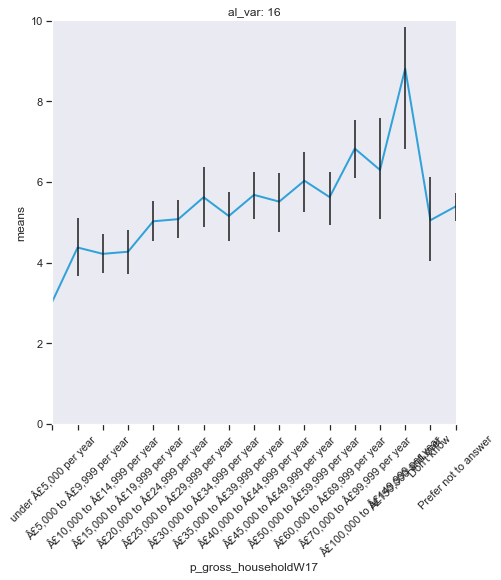
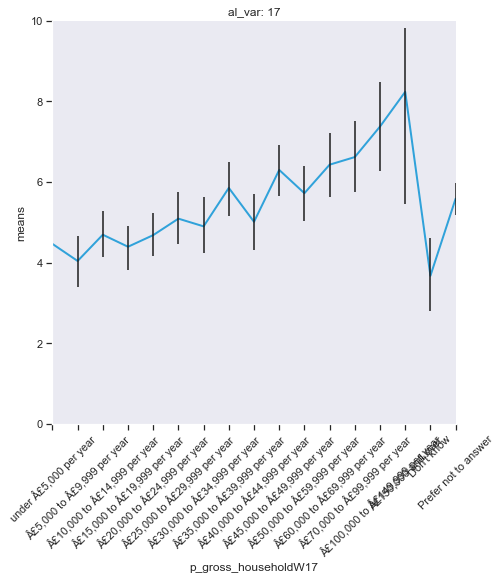
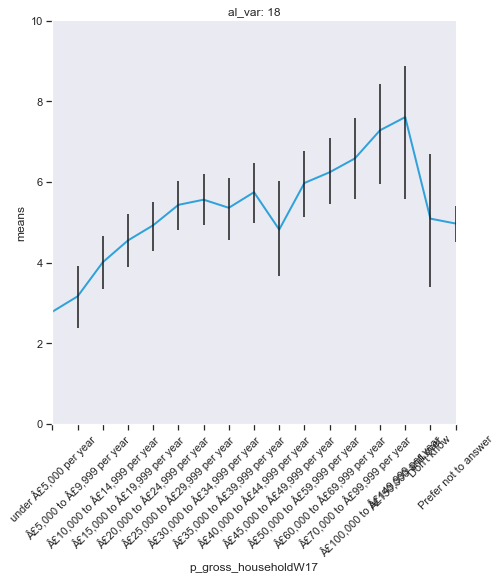
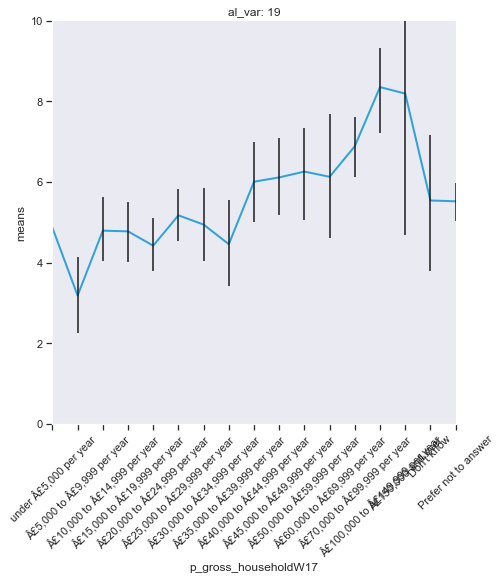
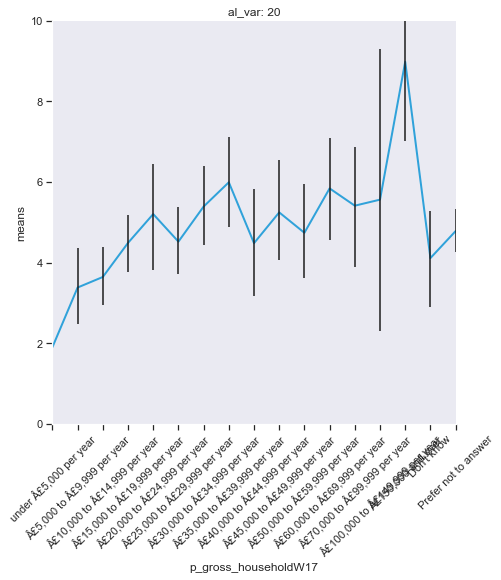

In [121]:
%%time
from holoviews import dim
hv_dict = {}

al_var_name="al_scaleW17"
x_var_name = "p_gross_householdW17"
y_var_name = "redistSelfW17"



df = BES_Panel[[al_var_name,y_var_name,x_var_name,"wt_new_W17"]]
df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df["wt_new_W17"]))


for al_var in range(0,21):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
    chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,df[x_var_name].cat.categories[x]) for x in range(0,len(df[x_var_name].cat.categories))],
              xrotation=45,fig_size=200)
    
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=['al_var'])
hm

In [26]:
# match(BES_Panel,"redistSelf")

In [27]:
# BES_Panel["redistSelfW17"].cat.categories

In [25]:
# chart_df

In [26]:
import statsmodels as sm
from statsmodels.stats.weightstats import DescrStatsW
# sm.stats.weightstats.DescrStatsW

# import numpy as np
np.random.seed(0)
x1_2d = 1.0 + np.random.randn(20, 3)
w1 = np.random.randint(1, 4, 20)
d1 = sm.stats.weightstats.DescrStatsW(x1_2d, weights=w1)
d1.mean
d1.var
d1.std_mean


array([0.15651776, 0.13929605, 0.14952489])

In [28]:
# hv.help(hv.Curve)

In [29]:
# hv.help(hv.Curve)

In [30]:
# pan_dataset_allr_values

In [31]:
# sum(pan_dataset_allr_values.index==BES_Panel.index)

In [32]:
# BES_Panel.index

In [33]:
# lr_col,al_col

In [34]:
# pan_dataset_allr_values.shape

In [137]:
%%time
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
lr.name = 'Economic Left-Right'
lr = lr.cat.rename_categories(["Left","Centre","Right"])
pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=lr,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

Wall time: 33 ms


Economic Left-Right            Left     Centre      Right
gorW19                                                   
North East                36.758683  28.417603  34.823714
North West                38.608712  26.341486  35.049801
Yorkshire and the Humber  37.552415  37.904692  24.542894
East Midlands             33.455414  26.814969  39.729617
West Midlands             29.886744  29.413343  40.699913
East of England           19.497523  28.831219  51.671258
London                    37.380565  39.827206  22.792229
South East                28.233676  31.217979  40.548345
South West                39.563381  30.769293  29.667326
Wales                     29.508345  49.112533  21.379122
Scotland                  38.393883  37.005072  24.601046

In [35]:
# pan_dataset_allr_values[lr_col][mask].index

In [36]:
# pd.Series(lr.index).tail(500)

In [37]:
# pan_dataset_allr_values

In [38]:
# BES_Panel.index

In [39]:
# lr.index

In [40]:
# df.shape,al.shape,lr.shape
# sum(df.index==al.index),al.shape

In [41]:
# df.index[df.index!=al.index]

In [42]:
# pd.qcut(pan_dataset_allr_values[al_col][mask].tail(50),10)

In [220]:
def weighted_qcut(values, weights, q, **kwargs):
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
        
    if values.isnull().sum()>0:
        raise Exception("nans in values")
        
    if weights.isnull().sum()>0:
        raise Exception("nans in weights")
        
    order = weights.loc[weights.index[values.argsort()]].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index()

In [228]:
# unweighted_qcut_test = pd.qcut(pan_dataset_allr_values[al_col][mask],10)

In [54]:
# weighted_qcut_test = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel["wt_new_W17"][mask],10 )

In [53]:
# mask = mask & pan_dataset_allr_values[al_col].notnull() & BES_Panel["wt_new_W17"].notnull()
# print(mask.sum(),34365)
# weighted_qcut_test = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel["wt_new_W17"][mask],10 )

In [52]:
# weighted_qcut_test

In [51]:
# len( set(unweighted_qcut_test.index) - set(weighted_qcut_test.index) )

In [50]:
# q=10
# values = pan_dataset_allr_values[al_col][mask]
# weights = BES_Panel["wt_new_W17"][mask]

# quantiles = np.linspace(0, 1, q + 1)

# order = weights.loc[weights.index[values.argsort()]].cumsum()
# order
# # bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
# # bins.sort_index()

In [47]:
# values.argsort().max()

In [48]:
# values.argsort().shape,values.shape

In [49]:
# values.isnull().sum()

In [46]:
# al.tail(500)

In [45]:
# chart_df["p_gross_householdW17"]

In [44]:
# from scipy import stats
# # def regression(index):
# #     if not index:
# #         return empty
# #     scatter = sample_data[index[0]]
# # xs, ys = scatter['x'], scatter['y']
# non_ord_mask = chart_df["p_gross_householdW17"]<=14
# xs = chart_df["p_gross_householdW17"][non_ord_mask]
# ys = chart_df["means"][non_ord_mask]

# slope, intercep, rval, pval, std = stats.linregress(xs, ys)
# # rho, pval = stats.spearmanr(xs,ys)
# xs = np.linspace(0,14,2)
# reg = slope*xs+intercep
# chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )

In [58]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").sort_index().loc[BES_Panel.index]
lr_col = pan_dataset_allr_values.columns[2]
al_col = pan_dataset_allr_values.columns[3]

from holoviews import dim
from scipy import stats

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_111 :Curve   [x]   (y)
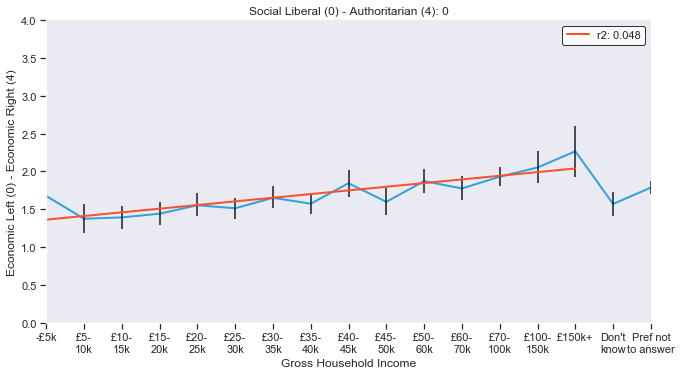
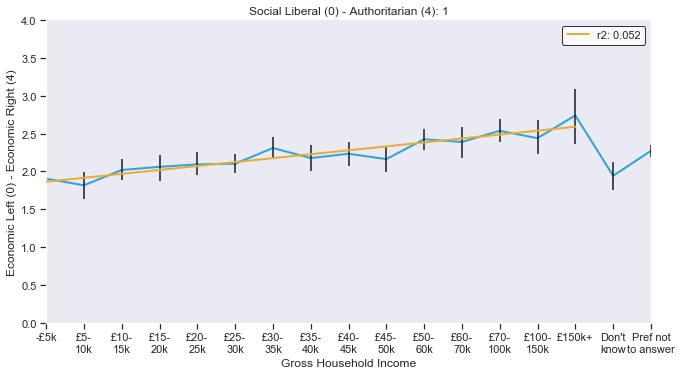
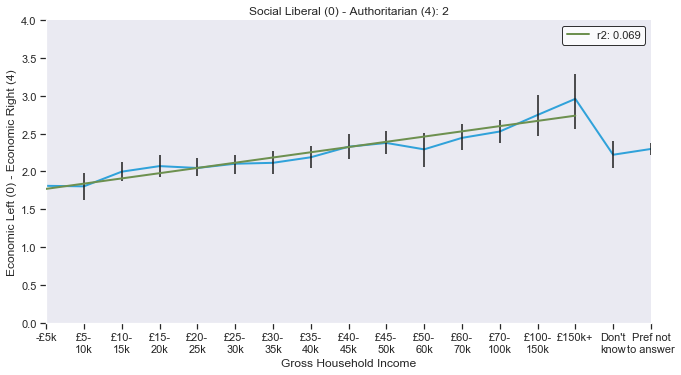
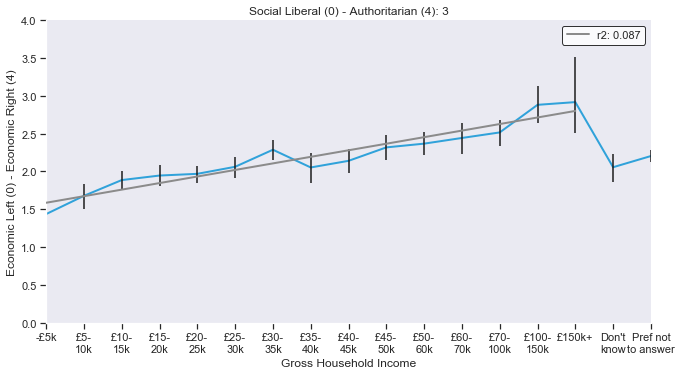
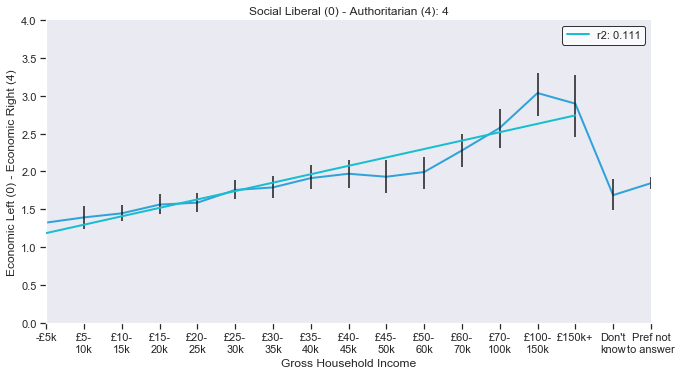

In [253]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"                  

y_var_name = "lr"
ylabel = "Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

df = BES_Panel[[x_var_name,wt_var]]

x_cat_list = df[x_var_name].cat.categories
x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

reg_plot = True


mask = BES_Panel[wt_var].notnull() & BES_Panel[x_var_name].notnull() & pan_dataset_allr_values[[lr_col,al_col]].notnull().all(axis=1)
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = df[mask]
df[al_var_name] = al
df[y_var_name] = lr

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel)
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_109 :Curve   [x]   (y)
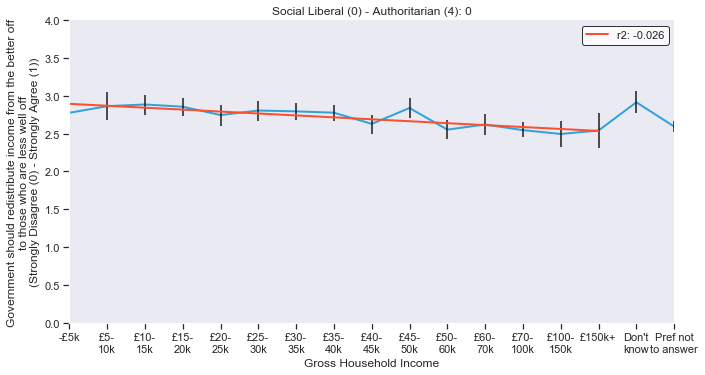
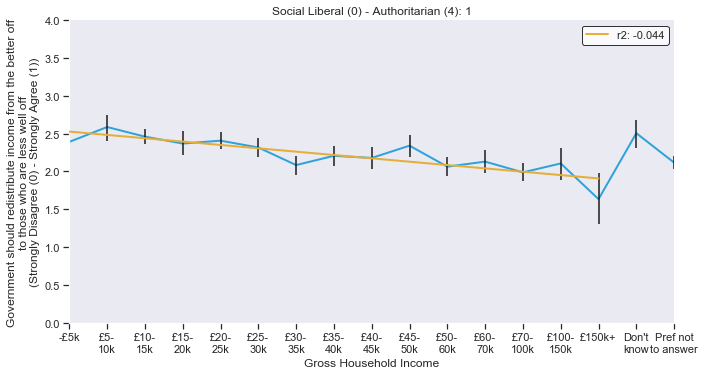
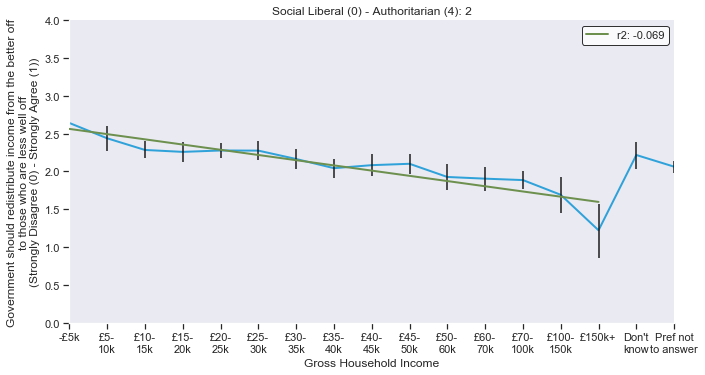
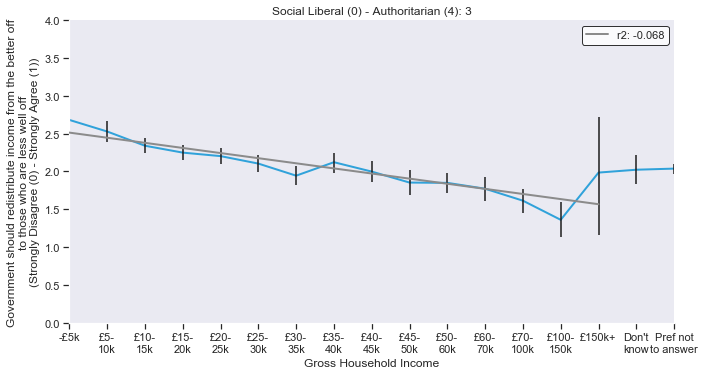
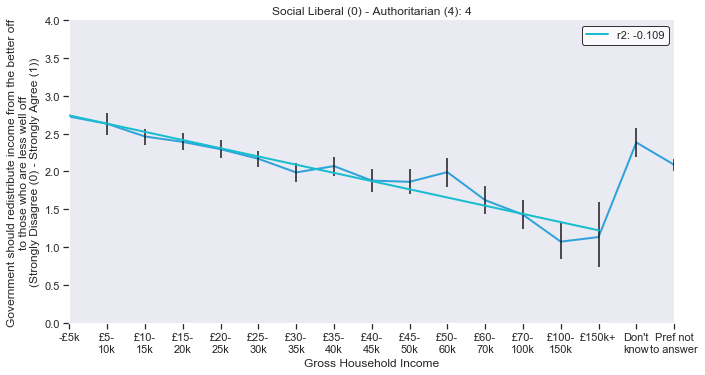

In [70]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"                  

y_var_name = "lr1W17"
ylabel = "Government should redistribute income from the better off\nto those who are less well off\n"+\
    "(Strongly Disagree (0) - Strongly Agree (1))"
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

x_cat_list = df[x_var_name].cat.categories
x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name]

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel)
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [p_socgradeW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [p_socgradeW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_170 :Curve   [x]   (y)
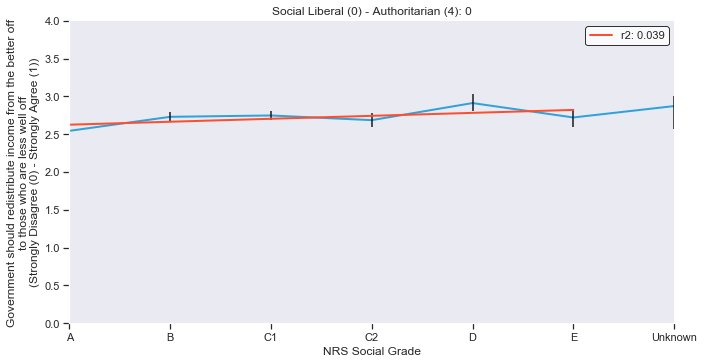
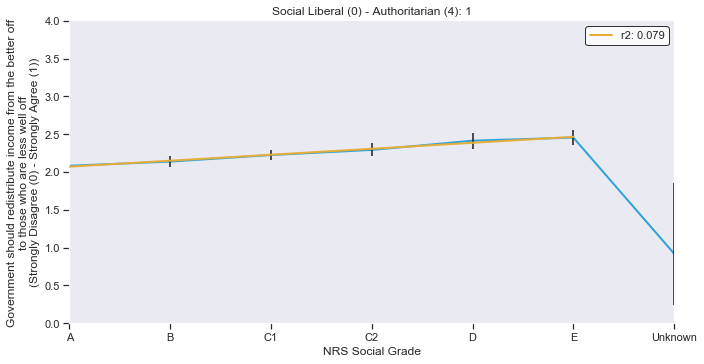
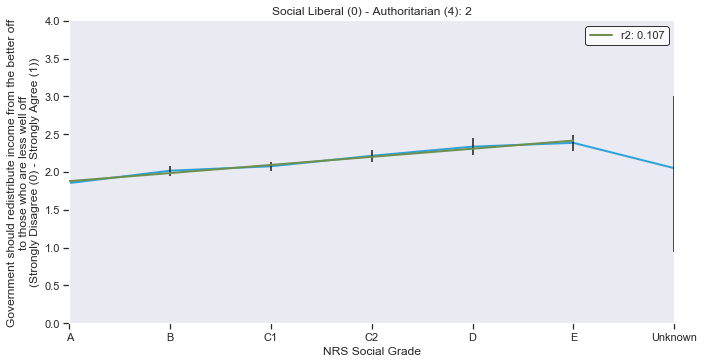
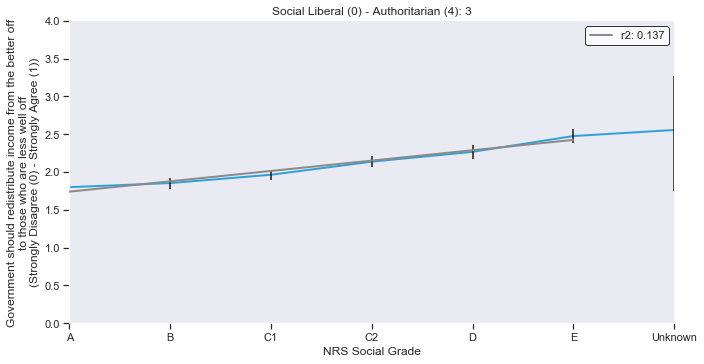
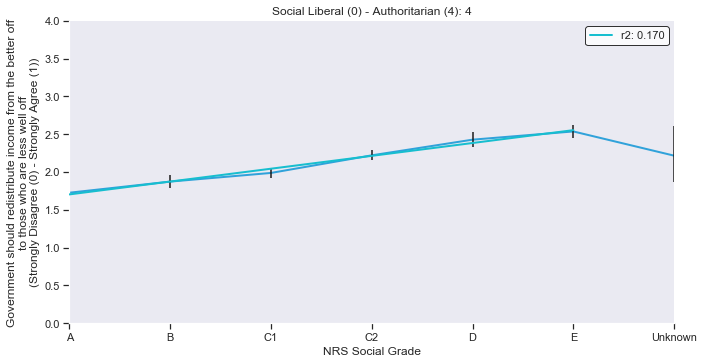

In [80]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"                  

y_var_name = "lr1W17"
ylabel = "Government should redistribute income from the better off\nto those who are less well off\n"+\
    "(Strongly Disagree (0) - Strongly Agree (1))"
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "p_socgradeW17"
xlabel = "NRS Social Grade"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [6]

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel)
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_edlevelW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_edlevelW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_126 :Curve   [x]   (y)
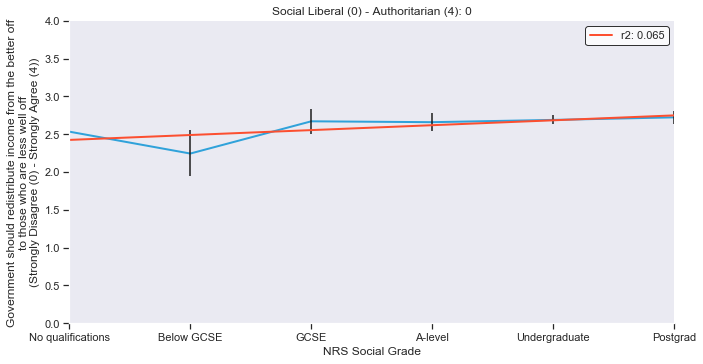
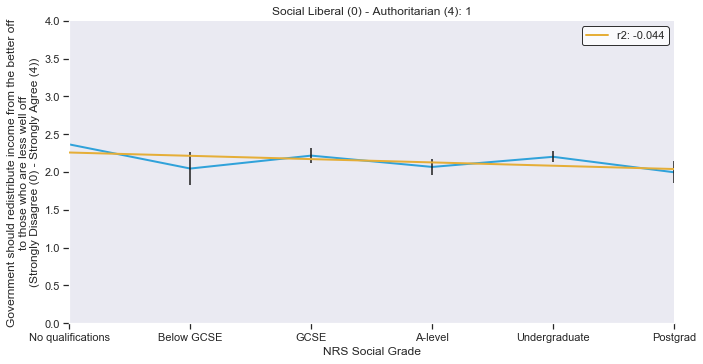
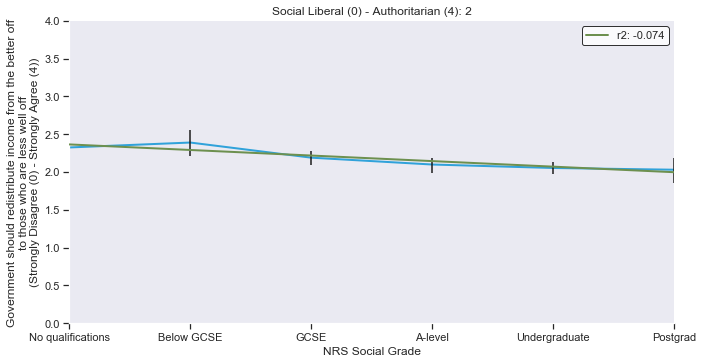
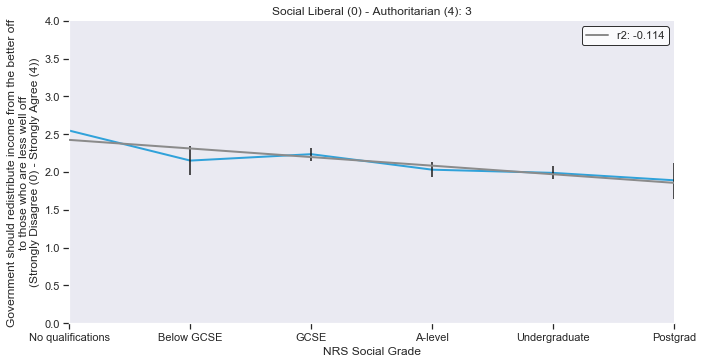
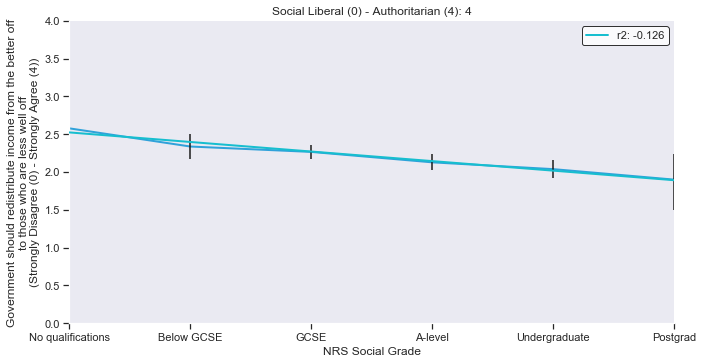

In [108]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"                  

y_var_name = "lr1W14W15"
ylabel = "Government should redistribute income from the better off\nto those who are less well off\n"+\
    "(Strongly Disagree (0) - Strongly Agree (4))"
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "p_edlevelW17"
xlabel = "NRS Social Grade"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [6]

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel)
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_143 :Curve   [x]   (y)
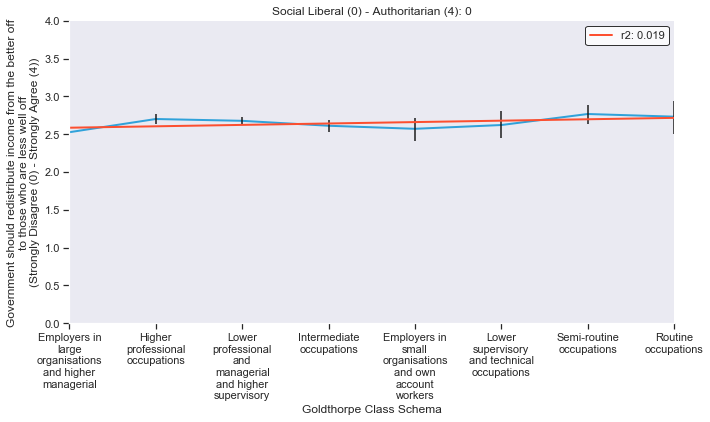
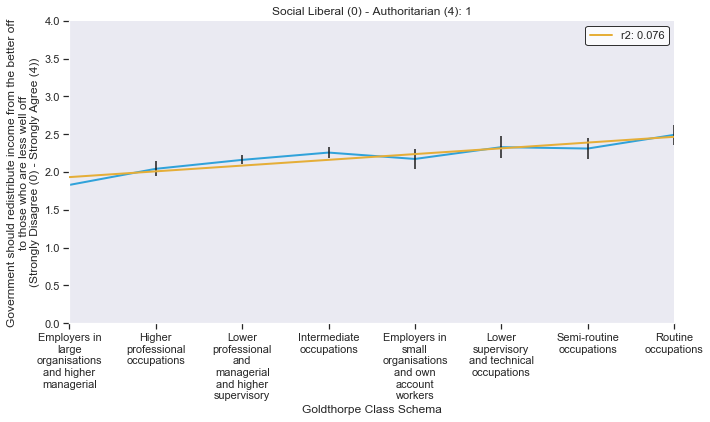
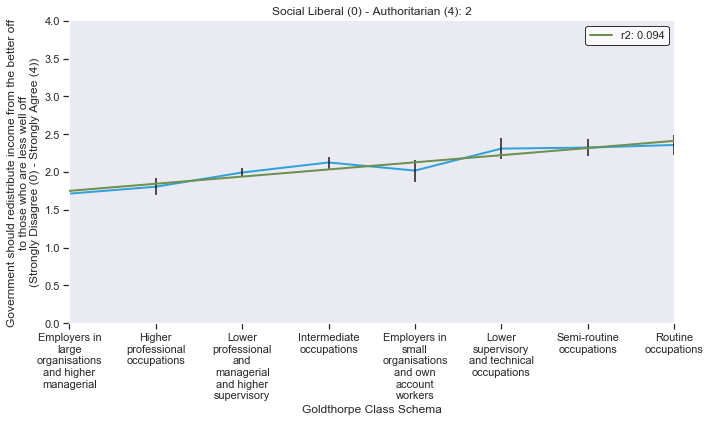
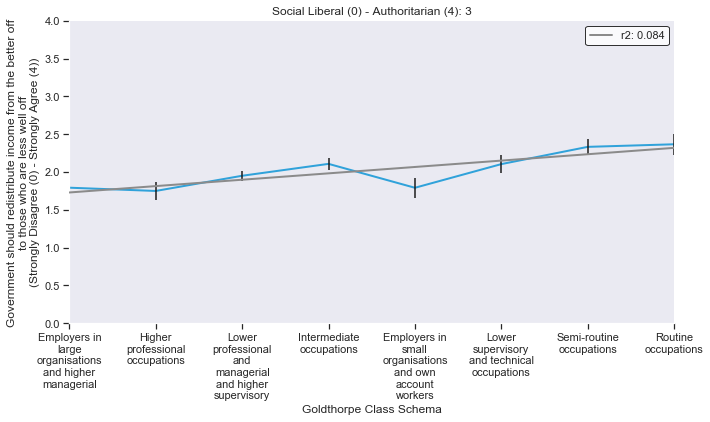
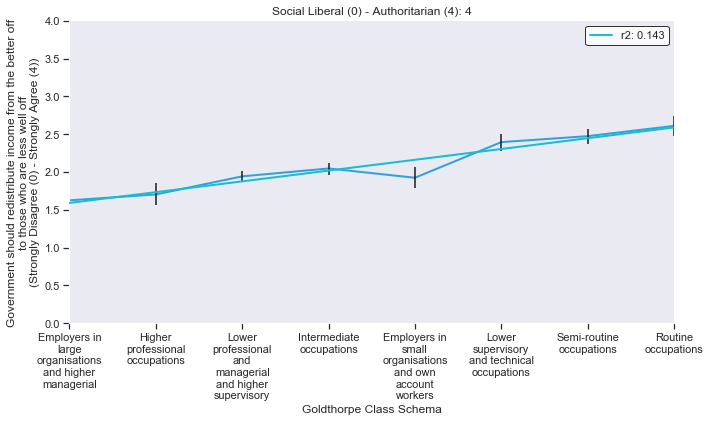

In [109]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"                  

y_var_name = "lr1W17"
ylabel = "Government should redistribute income from the better off\nto those who are less well off\n"+\
    "(Strongly Disagree (0) - Strongly Agree (4))"
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "ns_sec_analyticW16W17W18"
xlabel = "Goldthorpe Class Schema"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]

import textwrap
wrapper = textwrap.TextWrapper(width=13) 
x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]  

non_ord_indices = []

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel)
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_369 :Curve   [x]   (y)
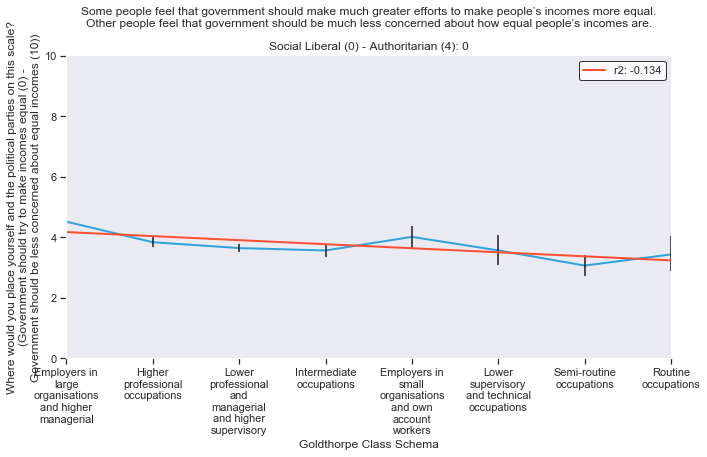
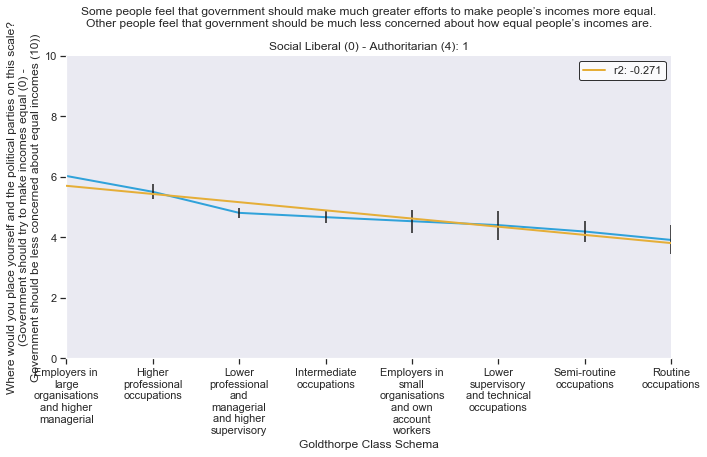
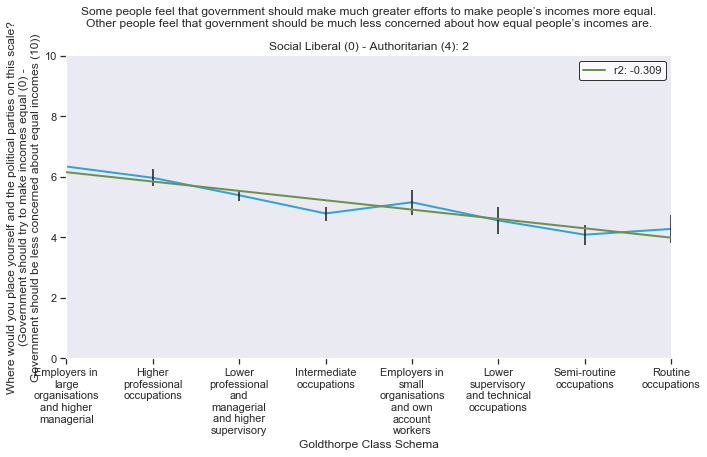
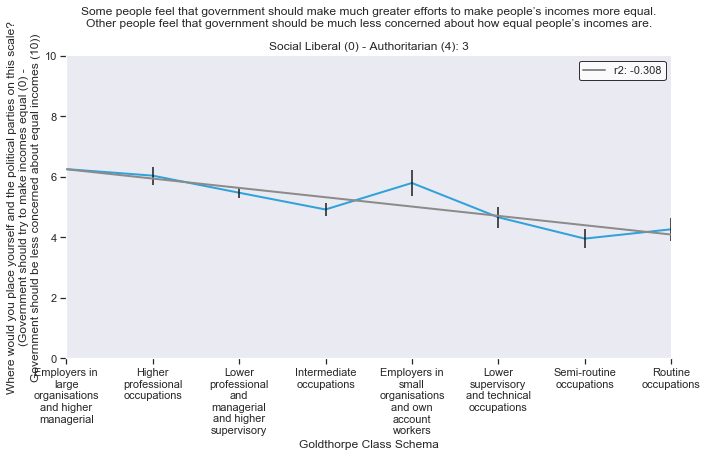
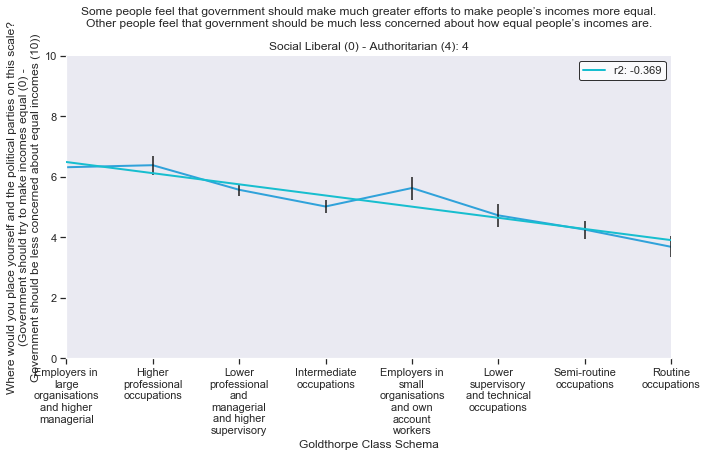

In [107]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"   

title = "\n".join(["Some people feel that government should make much greater efforts to make people’s incomes more equal.",
                    "Other people feel that government should be much less concerned about how equal people’s incomes are."])

y_var_name = "redistSelfW17"
ylabel = "\n".join(["Where would you place yourself and the political parties on this scale?",
                    "(Government should try to make incomes equal (0) -","Government should be less concerned about equal incomes (10))"])
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "ns_sec_analyticW16W17W18"
xlabel = "Goldthorpe Class Schema"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]

import textwrap
wrapper = textwrap.TextWrapper(width=13) 
x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]  

non_ord_indices = []

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel,
              title = title+"\n"+'{label} {group}\n{dimensions}')
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [ ]:
Grammar School Reintroduction x Class

Some evidence of 'culture war' saturation in the most Authoritarian

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [ns_sec_analyticW6W7W8W9]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [ns_sec_analyticW6W7W8W9]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_045 :Curve   [x]   (y)
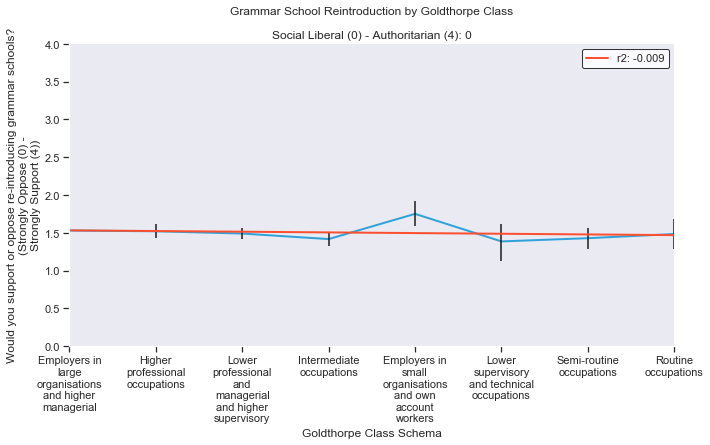
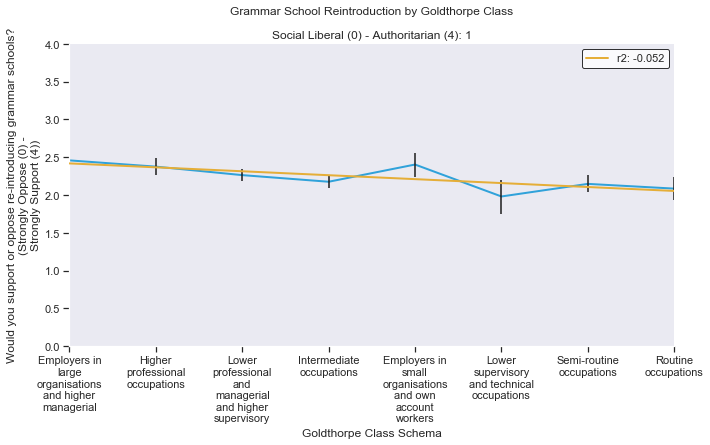
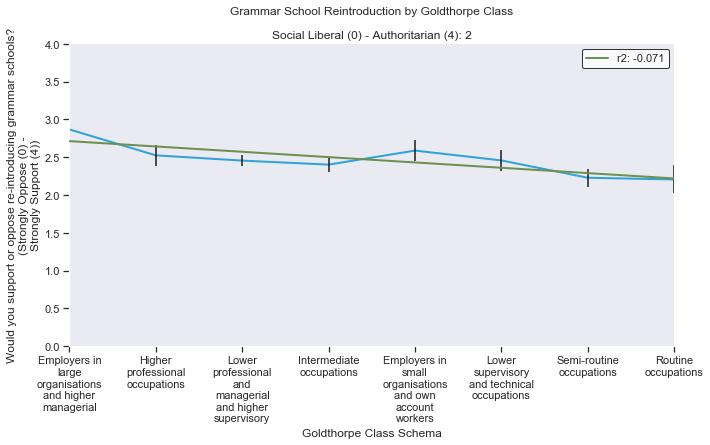
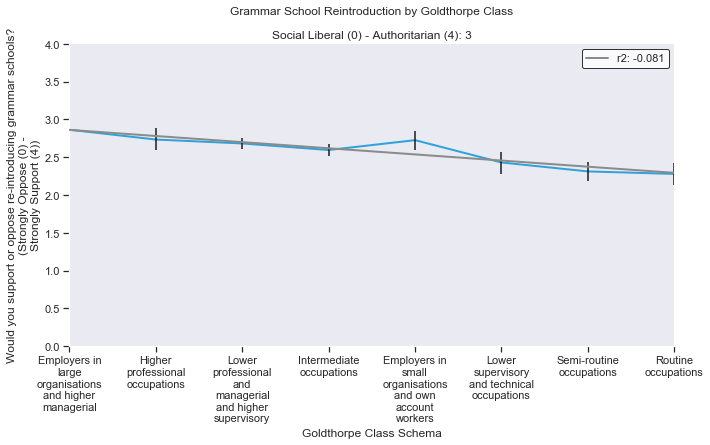
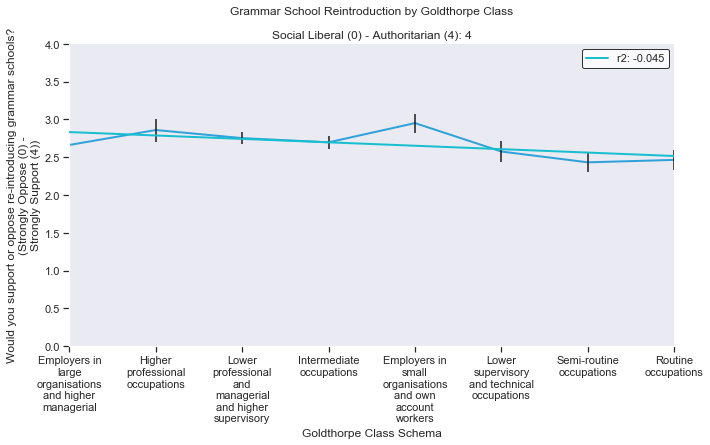

In [115]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"   

title = "\n".join(["Grammar School Reintroduction by Goldthorpe Class"])

y_var_name = "grammarW10"
ylabel = "\n".join(["Would you support or oppose re-introducing grammar schools?",
                    "(Strongly Oppose (0) -","Strongly Support (4))"])
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W10"

x_var_name = "ns_sec_analyticW6W7W8W9"
xlabel = "Goldthorpe Class Schema"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]

import textwrap
wrapper = textwrap.TextWrapper(width=13) 
x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]  

non_ord_indices = []

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel,
              title = title+"\n"+'{label} {group}\n{dimensions}')
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW17]   (means,lower_error,upper_error)
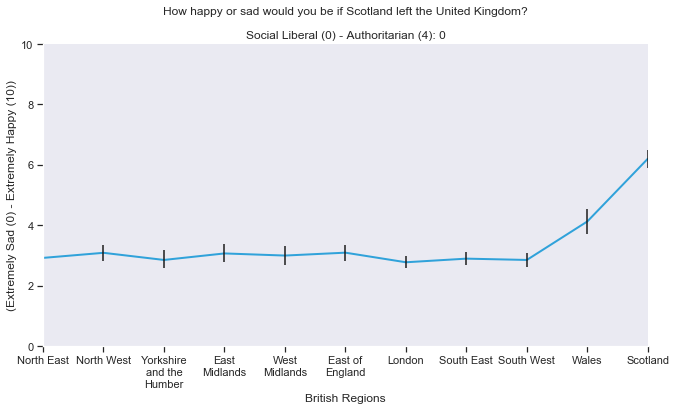
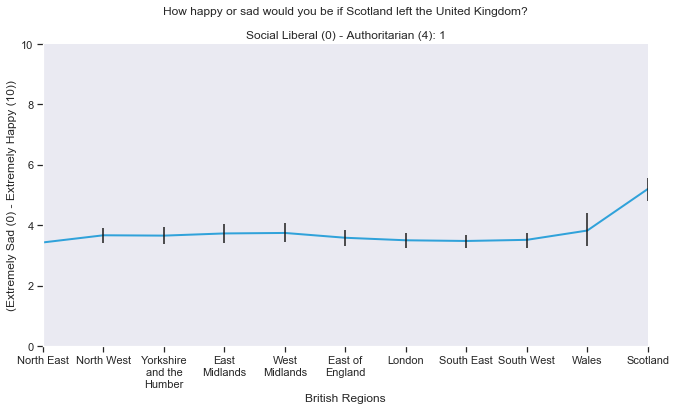
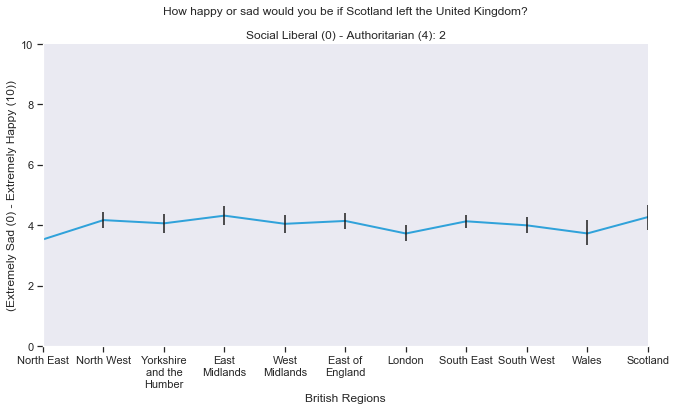
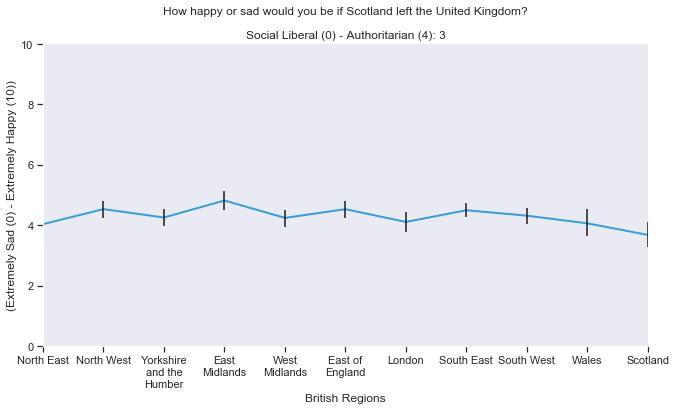
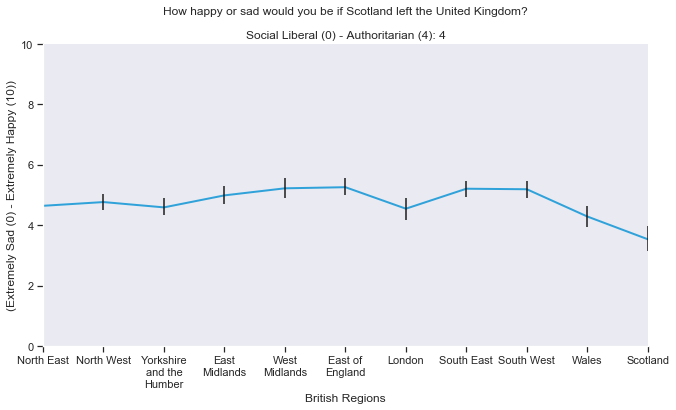

In [254]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"   

title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?"])

y_var_name = "happyScotIndepResultW17"
ylabel = "\n".join(["(Extremely Sad (0) - Extremely Happy (10))"])
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "gorW17"
xlabel = "British Regions"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]

import textwrap
wrapper = textwrap.TextWrapper(width=10) 
x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]  

non_ord_indices = []

reg_plot = False


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel,
              title = title+"\n"+'{label} {group}\n{dimensions}')
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [255]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, 'holomap.gif', fps=1)


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_edlevelW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_edlevelW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_055 :Curve   [x]   (y)
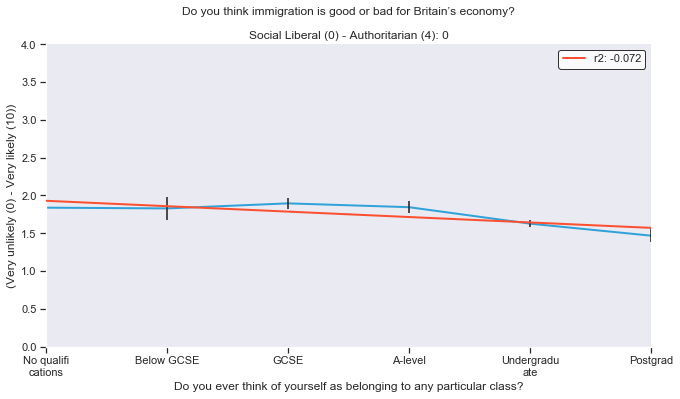
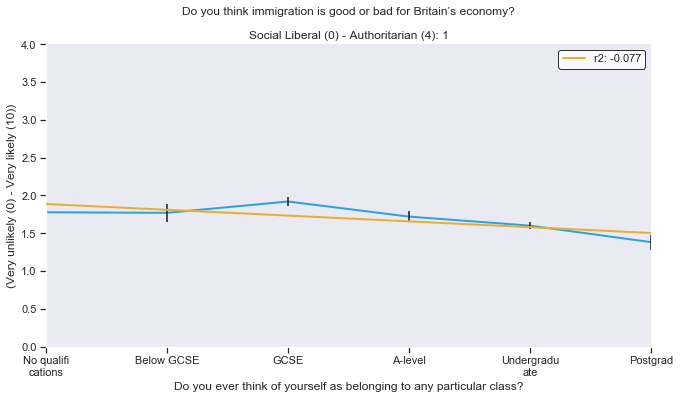
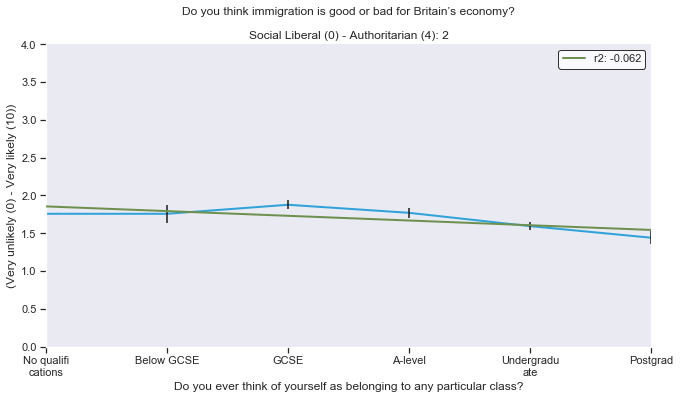
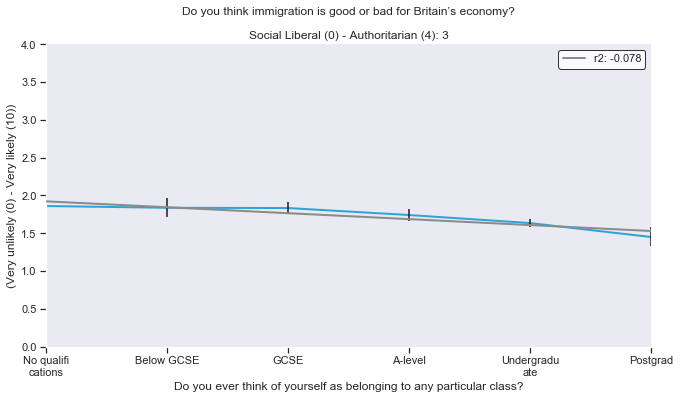
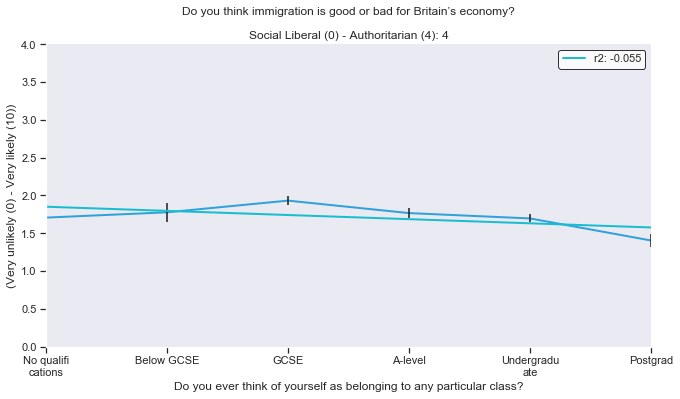

In [203]:
# %%time

hv_dict = {}

q=5

al_var_name="al"
zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"   

title = "\n".join(["Do you think immigration is good or bad for Britain’s economy?"])

y_var_name = "femaleEqualityW17"
ylabel = "\n".join(["(Very unlikely (0) - Very likely (10))"])
    
#"Economic Left (0) - Economic Right ("+str(q-1)+")"

wt_var = "wt_new_W17"

x_var_name = "p_edlevelW17"
xlabel = "Do you ever think of yourself as belonging to any particular class?"

x_cat_list = BES_Panel[x_var_name].cat.categories
# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]

import textwrap
wrapper = textwrap.TextWrapper(width=10) 
x_cat_list = [wrapper.fill(text=x[0:50])  for x in x_cat_list]  

non_ord_indices = [6]

reg_plot = True


mask =  BES_Panel[wt_var].notnull() &\
        BES_Panel[x_var_name].notnull() &\
        pan_dataset_allr_values[al_col].notnull()&\
        BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()
        
# lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

df = BES_Panel[[x_var_name,wt_var]][mask]
df[al_var_name] = al
df[y_var_name] = BES_Panel[y_var_name].replace("Don't know",np.nan)

if df[y_var_name].dtype.name=='category':
    df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
max_y_value=df[y_var_name].max()
df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


for al_var in range(0,q):
    mask = df[al_var_name]==al_var
    means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
    wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
    lower = wt_mean_errors.apply(lambda x: x[0])
    upper = wt_mean_errors.apply(lambda x: x[1])
    count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

    chart_df = pd.DataFrame()
    chart_df["means"]=means
    chart_df["lower_error"]=lower
    chart_df["upper_error"]=upper
    chart_df["N"]=count
#     chart_df

    chart_df = chart_df.reset_index()
    chart_df[x_var_name] = chart_df[x_var_name].cat.codes
    chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
    chart_df["lower_error"] = chart_df["lower_error"].abs()

    chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])

    
    non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
    xs = chart_df[x_var_name][non_ord_mask]
    ys = chart_df["means"][non_ord_mask]

    slope, intercep, rval, pval, std = stats.linregress(xs, ys)
    # rho, pval = stats.spearmanr(xs,ys)
#     xs = np.linspace(0,14,2)
    if reg_plot:
        reg = slope*xs+intercep
        chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
    chart.opts(ylim=(0,max_y_value),
              xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
              fig_size=300,aspect=2,    
              xlabel =xlabel, ylabel=ylabel,
              title = title+"\n"+'{label} {group}\n{dimensions}')
#xrotation=45,
    hv_dict[al_var] = chart

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [7]:
BES_reduced_with_na = pd.read_pickle("E:\\BES_analysis_data"+os.sep+"BES_reduced_with_na.zip",compression='zip')
BES_reduced_with_na = BES_reduced_with_na.loc[BES_Panel.index].sort_index()

In [8]:
BES_reduced_with_na["goldthorpeW6W7W8W9"] = BES_Panel["ns_sec_analyticW6W7W8W9"].cat.codes.replace(-1,np.nan)
BES_reduced_with_na["p_disabilityW10__Yes, limited a lot"] = BES_Panel["p_disabilityW10"].cat.reorder_categories(['No', 'Yes, limited a little', 'Yes, limited a lot']).cat.codes.replace(-1,np.nan)
BES_reduced_with_na["p_parentW10__Yes"] = BES_Panel["p_parentW10"].cat.codes.replace(-1,np.nan)

In [10]:
demog_var = "travelEU|passportUK|passportOther|passportExpired|passportNever|livedAbroad|friendsEU|parentsForeign|motherCountryBorn|fatherCountryBorn"
demog_var = "|".join([demog_var,"ukCitizenW14|euCitizenW14|commonwealthCitizenW14|otherCitizenW14"])
demog_var = "|".join([demog_var,"gorW10|countryOfBirth[^W]|educationW8W9W10|profile_education_age[^W]|edlevelW8W9W10|anyUniW10"])
demog_var = "|".join([demog_var,"privPrimSchlW1_W4W7W9_W12W14W15|privScndSchlW1_W4W7W9_W12W14W15|neverPrivSchlW1_W4W7W9_W12W14W15|prvSchDKW1_W4W7W9_W12W14W15"])
demog_var = "|".join([demog_var,"marital|gender[^R]|disability[^W]|profile_ethnicity[^2W]|Age|profile_religion[^W]|profile_sexualityW10"])
demog_var = "|".join([demog_var,"profile_household_size[^W]|profile_household_children[^W]"])
demog_var = "|".join([demog_var,"preschoolKidsInHouseW6_W14|preschoolKidsInHouseW6_W14|sickElderlyInHouseW6_W14|noDependentsInHouseW6_W14"])
demog_var = "|".join([demog_var,"profile_gross_household[^W]|profile_gross_personal[^W]|profile_house_tenure[^W]|allSourceIncome_\d+W11"])
demog_var = "|".join([demog_var,"profile_work_typeW7W10|workingStatusW6_W12|ns_sec_analyticW6W7W8W9|profile_socgradeW8"])
demog_var = "|".join([demog_var,"|".join(["mainSourceIncome","studentloan","selfOccSupervise","ns_sec_analyticW6W7W8W9","JACS_subject_label",
 "p_disabilityW10__Yes, limited a lot","p_parentW10__Yes","selfOccStatusW6_W12","selfOccSuperviseW6","goldthorpeW6W7W8W9"])])
demog_var = "|".join([demog_var,"|".join(["homeOwn","secondHome","buyHomeFuture","savings","debt","studentloan",
    "homeamtb","mortgagePayment","secondHomeAmtb","rentPayment","savingsAmtb","debtAmtb",
    "borrowEssentials","smallEmergency","worryEconSecurity",
    "riskPoverty","riskUnemployment",
    "numChildren",
    "forcedSubjClass","subjClass","subjClassSqueeze",
    "currentUnionMember","everUnionMember",
    "abroadCountry","livedAbroad","handed","languageSkills",])])

demog_vars = list(match(BES_reduced_with_na,demog_var,case_sensitive=True).index)


pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").sort_index().loc[BES_Panel.index]
lr_col = pan_dataset_allr_values.columns[2]
al_col = pan_dataset_allr_values.columns[3]

def weighted_qcut(values, weights, q, **kwargs):
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
        
    if values.isnull().sum()>0:
        raise Exception("nans in values")
        
    if weights.isnull().sum()>0:
        raise Exception("nans in weights")
        
    order = weights.loc[weights.index[values.argsort()]].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index()

In [11]:
mask = (BES_reduced_with_na[demog_vars].notnull().sum(axis=1)>20) & pan_dataset_allr_values[al_col].notnull()
# %%time
BES_not_nulls = BES_reduced_with_na[mask].notnull().sum()
# BES_not_nulls.hist(bins=100);

In [12]:
extra_drop_list = "|".join( ["mainSourceIncome","al\d|al_scale","studentloan","ethnicity","selfOccSupervise","profile_marital_stat",
"ns_sec","JACS_subject_label","schoolKidsInHouse","profile_work_stat","profile_socialgrade_cie","jobzone",
 "profile_work_industry","subjectHE","p_disabilityW10__Yes, limited a lot","p_parentW10__Yes","profile_past_vote",
"selfOcc","goldthorpeW6W7W8W9","profile",
    "homeOwn","secondHome","buyHomeFuture","savings","debt","studentloan",
    "homeamtb","mortgagePayment","secondHomeAmtb","rentPayment","savingsAmtb","debtAmtb",
    "borrowEssentials","smallEmergency","worryEconSecurity",
    "riskPoverty","riskUnemployment",
    "numChildren",
    "forcedSubjClass","subjClass","subjClassSqueeze",
    "currentUnionMember","everUnionMember",
    "abroadCountry","livedAbroad","handed","languageSkills",] )

In [13]:
# drop values in demog list (removing details )

non_demog_df = BES_reduced_with_na[mask]\
    .drop(match(BES_reduced_with_na,"|".join([x.split("W")[0].split("[")[0] for x in demog_var.split("|")]) ).index,axis=1)\
    .drop(BES_not_nulls[BES_not_nulls<10000].index,axis=1,errors='ignore').copy().astype('float32')\
    .drop(match(BES_reduced_with_na,extra_drop_list).index,axis=1,errors='ignore').copy().astype('float32')


non_demog_df["genderRolesW10__Strongly agree"] = BES_reduced_with_na["genderRolesW10__Strongly agree"][mask].astype('float32')

In [14]:
demog_df = BES_reduced_with_na[demog_vars][mask].copy().astype('float32')
non_demog_df.shape, demog_df.shape

((78876, 5126), (78876, 350))

In [16]:
%%time
al_split = pd.qcut(pan_dataset_allr_values[al_col][mask],3,).cat.codes


store_corrs = pd.DataFrame()
BES_notnulls = BES_reduced_with_na[demog_df.columns][mask].notnull()
non_demog_notnulls = non_demog_df>0
min_sample_size=100

for demo_var in demog_df.columns:
    
#     min_sample_al2 = non_demog_df[al_split==2].notnull()[demog_df[demog_df.columns[colno]][al_split==2].notnull()].sum().min()
#     min_sample_al0 = non_demog_df[al_split==0].notnull()[demog_df[demog_df.columns[colno]][al_split==0].notnull()].sum().min()
#     if min(min_sample_al0,min_sample_al2)<500:
#         continue
    # add sample size count
    
    store_corrs[demo_var] = non_demog_df[al_split==2].corrwith( demog_df[demo_var][al_split==2] )\
        - non_demog_df[al_split==0].corrwith( demog_df[demo_var][al_split==0] )
    
    undersampled = non_demog_notnulls[BES_notnulls[demo_var]][(al_split==0)].sum()<min_sample_size
    store_corrs.loc[undersampled[undersampled].index,demo_var] = np.nan
    undersampled = non_demog_notnulls[BES_notnulls[demo_var]][(al_split==2)].sum()<min_sample_size
    store_corrs.loc[undersampled[undersampled].index,demo_var] = np.nan 

Wall time: 1h 20min 24s


In [190]:
BES_Panel["p_past_vote_2005__Conservative"] = BES_Panel["p_past_vote_2005"]=="Conservative"

In [199]:
search(BES_Panel,"p_education")

p_education_ageW1     30379
p_educationW1         30383
p_education_ageW2     30239
p_educationW2         30239
p_education_ageW3     28119
p_educationW3         28120
p_education_ageW4     31294
p_educationW4         31442
p_education_ageW5     30787
p_educationW5         30829
p_education_ageW6     30119
p_educationW6         30149
p_education_ageW7     29939
p_educationW7         30841
p_education_ageW8     33150
p_educationW8         33498
p_education_ageW9     29784
p_educationW9         30034
p_education_ageW10    28750
p_educationW10        30236
p_education_ageW11    30175
p_educationW11        30955
p_education_ageW12    33635
p_educationW12        34393
p_education_ageW13    30749
p_educationW13        31135
p_education_ageW14    30335
p_educationW14        31061
p_education_ageW15    29951
p_educationW15        30840
p_education_ageW16    36005
p_educationW16        37959
p_education_ageW17    33239
p_educationW17        34365
p_education_ageW18    37277
p_educationW18      

In [200]:
search(BES_Panel,"femaleEquality")

femaleEqualityW15        5109
femaleEqualityW16       37959
femaleEqualityW17       34366
femaleEqualityW1_W5     41876
femaleEqualityW6_W14    63749
dtype: int64

In [124]:
BES_Panel["subjClassW17"].value_counts()

Yes, working class    13140
No                     9779
Yes, middle class      9012
Don't know             2025
Yes, other              410
Name: subjClassW17, dtype: int64

In [184]:
BES_Panel["mpVoteConstSelfW17"].cat.categories

Index(['MP should vote according to their own opinion',
       'MP should vote according to the opinion of voters in their constituency',
       'Don't know'],
      dtype='object')

In [158]:
store_corrs = pd.read_pickle("..\\BES_analysis_publications\\Authoritarianism as Mediator\\store_corrs.zip",compression='zip')
# store_out   = pd.read_pickle("..\\BES_analysis_publications\\Authoritarianism as Mediator\\store_out.zip",compression='zip')

In [145]:
store_out = pd.concat([store_corrs.abs().idxmax(),store_corrs.abs().max()],axis=1)
store_out.columns = ["max_regressor","max_correlation"]
store_out.sort_values(by="max_correlation",ascending=False).head(50)
store_out.to_pickle("..\\BES_analysis_publications\\Authoritarianism as Mediator\\store_out.zip",compression='zip')

TypeError: bad operand type for abs(): 'str'

In [156]:
store_corrs["max_correlation"].apply(lambda x: abs(x) if pd.notnull(x) else np.nan).idxmax()

'gorW10_Scotland'

In [164]:
store_corrs.sort_values(by='max_correlation',ascending=False).head(50)

max_regressor  \
gorW10_Scotland                                              happyScotIndepResultW17__Extremely happy   
countryOfBirth_Scotland                                      happyScotIndepResultW17__Extremely happy   
countryOfBirth_England                                       happyScotIndepResultW17__Extremely happy   
selfOccSuperviseW2_Yes                                                 immigEconW13__Good for economy   
selfOccSuperviseLastW11_Yes                           generalElectionCertaintyW11__Completely certain   
languageSkillsWelshW8_Yes                                            econGenRetroW8__Got a lot better   
selfOccSuperviseW4_Yes                                                       euID7W16__Strongly agree   
selfOccSuperviseLastW15_Yes                                                            lrLDW18__Right   
selfOccSuperviseLastW2_Yes                                         trustMPsW18__A great deal of trust   
selfOccSuperviseLastW14_Yes                                          happyNIIndepResultScaleW17__10.0   
mortgagePaymentW14__100.0                                                      spendMost4W2_Education   
selfOccSuperviseLastW9_Yes                                                           lrUKIPW16__Right   
selfOccSuperviseLastW4_Yes                          eesEUIntegrationLabW4__Unification should be p...   
selfOccSuperviseW15_Yes                                              majorityPartyLabW18__Very likely   
selfOccSuperviseLastW7_Yes                                 natSecurityGrnW11__Protect civil liberties   
selfOccSuperviseW3_Yes                                           regSatisfactionW4__Very dissatisfied   
selfOccSuperviseW12_Yes                                                headHouseholdPastW13_My father   
subjClassSqueezeW19_Working class                                               ptvConW5__Very likely   
selfOccSuperviseW11_Yes                                            efficacyPolCareW15__Strongly agree   
selfOccSuperviseLastW10_Yes                         winConstituencyGreenW17__100 - Very likely to win   
selfOccSuperviseW10_Yes                                                      partyContactCon_2W13_Yes   
selfOccSuperviseW7_Yes                                                      voteMethodEurope_2W16_Yes   
rentPaymentW14                                                                         prevJobW19_Yes   
mainSourceIncomeW6_Occupational pension(s) - fr...  mapInequalityW3__Differences in income are ver...   
subjClassW15_Yes, working class                                                ptvGrnW16__Very likely   
selfOccSuperviseW14_Yes                                                      euID6W17__Strongly agree   
secondHomeAmtbW14__£1 million or above                                   pidWeTheyW17__Strongly agree   
selfOccSuperviseLastW3_Yes                                         preferConCoalitionW5__Ranked fifth   
selfOccSuperviseW9_Yes                                                             lrBrexitW17__Right   
buyHomeFutureW14_Yes, I will be able to buy wit...                   likeLongBaileyW19__Strongly like   
subjClassW15_Yes, middle class                                      mpBrexitViewW17__Strongly support   
forcedSubjClassW14_Working class                                                 ptvLDW3__Very likely   
currentUnionMemberW17_Yes                             winConstituencyConW18__100 - Very likely to win   
gender_Female                                       mpVoteConstSelfW17_MP should vote according to...   
everUnionMemberW16_Yes                                                achieveReduceImmigBrexitW17_Yes   
everUnionMemberW17_Yes                                winConstituencyConW17__100 - Very likely to win   
mainSourceIncomeW6_Invalidity, sickness or disa...                                spendMost1W2_Health   
buyHomeFutureW14_No, I will not be able to purc...                           likeConW4__Strongly l

In [71]:
BES_reduced_with_na = pd.read_pickle("E:\\BES_analysis_data"+os.sep+"BES_reduced_with_na.zip",compression='zip')

In [208]:
BES_reduced_with_na = BES_reduced_with_na.loc[BES_Panel.index]
BES_reduced_with_na = BES_reduced_with_na.sort_index()

pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").loc[BES_Panel.index]

In [ ]:
var_type, cat_dictionary, new_old_col_names, old_new_col_names

In [218]:

# = pan_dataset_allr_values.loc[BES_Panel.index]

In [ ]:
focal_corr_dict = {}

In [55]:
# [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))]

In [105]:
hv.help(hv.Curve)

Curve

Online example: http://holoviews.org/reference/elements/matplotlib/Curve.html

-------------
Style Options
-------------

	alpha, c, color, linestyle, linewidth, lw, marker, ms, visible

(Consult matplotlib's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'CurvePlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                             Value                    Type         Bounds     Mode  

apply_extents                     True                  Boolean        (0, 1)     V RW  
apply_ranges                      True                  Boolean        (0, 1)     V RW  
apply_ticks                       True                  Boolean        (0, 1)     V RW  
aspect                          'square'               Parameter                  V RW  
auto

In [231]:
BES_notnulls = BES_reduced_with_na.astype('float32').replace(0,np.nan).notnull()

In [286]:
search(BES_reduced_with_na,"redistSelf")

redistSelfW1__Government should be less concerned about equal incomes     27187
redistSelfW2__Government should be less concerned about equal incomes     25887
redistSelfW3__Government should be less concerned about equal incomes     24524
redistSelfW4__Government should be less concerned about equal incomes     27698
redistSelfW6__Government should be less concerned about equal incomes     27091
redistSelfW7__Government should be less concerned about equal incomes     28275
redistSelfW10__Government should be less concerned about equal incomes    25624
redistSelfW11__Government should be less concerned about equal incomes    26782
redistSelfW12__Government should be less concerned about equal incomes     7811
redistSelfW13__Government should be less concerned about equal incomes    27268
redistSelfW14__Government should be less concerned about equal incomes    27301
redistSelfW15__Government should be less concerned about equal incomes    26942
redistSelfW16__Government should be less

In [289]:

focal_var = BES_reduced_with_na["redistSelfW17__Government should be less concerned about equal incomes"].astype('float32')
#pan_dataset_allr_values[lr_col]
mask = focal_var.notnull()

In [290]:
%%time
al_split = pd.qcut(pan_dataset_allr_values[al_col][mask],3,).cat.codes

focal_corr = BES_reduced_with_na[mask][al_split==2].astype('float32').corrwith( focal_var[mask][al_split==2] )\
           - BES_reduced_with_na[mask][al_split==0].astype('float32').corrwith( focal_var[mask][al_split==0] )

Wall time: 1min 14s


In [291]:
# %%time
# BES_notnulls[mask].sum()

In [292]:
focal_corr.shape

(11963,)

In [293]:
focal_corr_with_ss = pd.concat([focal_corr,BES_notnulls[mask].sum()],axis=1)
focal_corr_with_ss.columns = ["correlation","sample size"]
focal_corr_with_ss

correlation  sample size
turnoutUKGeneralW1__Very likely that I will vote     0.154555         7255
turnoutUKGeneralW2__Very likely that I will vote     0.123644         7744
turnoutUKGeneralW3__Very likely that I will vote     0.134005         7641
turnoutUKGeneralW4__Very likely that I will vote     0.101447         8902
turnoutUKGeneralW5__Very likely that I will vote     0.114257         7911
...                                                       ...          ...
conPriorities2_crimeW4_Yes                           0.047118          695
sharedContentOnline_1W5_Yes                          0.143607          797
partySiteOthW5_Yes                                  -0.016009           88
euCitizenW1_Yes                                      0.075616          280
conPriorities2_natsecW4_Yes                          0.117973         1075

[11963 rows x 2 columns]

In [294]:

# focal_corr_dict["lr"] = focal_corr_with_ss
# focal_corr_dict["gayEqualityW6_W14"] = focal_corr_with_ss
# focal_corr_dict["gayMarriageW10__Strongly agree"] = focal_corr_with_ss
# focal_corr_dict["tuitionFeesTooFarW13__Gone much too far"] = focal_corr_with_ss
focal_corr_dict["redistSelfW17__Government should be less concerned about equal incomes"] = focal_corr_with_ss


In [295]:
focal_corr_with_ss[focal_corr_with_ss["sample size"]>1000].dropna().abs().sort_values(by="correlation",ascending=False).head(50)

correlation  sample size
redistBrexitW17__Government should be less conc...     0.664778      18209.0
redistConW17__Government should be less concern...     0.633721      24103.0
redistUKIPW13__Government should be less concer...     0.485538       8411.0
redistUKIPW12__Government should be less concer...     0.479455       2247.0
redistUKIPW11__Government should be less concer...     0.472682       8094.0
redistConW19__Government should be less concern...     0.468276      16709.0
redistUKIPW6__Government should be less concern...     0.466003       6076.0
redistConW11__Government should be less concern...     0.459914      10060.0
redistConW13__Government should be less concern...     0.457708      11052.0
redistBrexitW16__Government should be less conc...     0.455708       9520.0
redistBrexitW18__Government should be less conc...     0.445411      13865.0
natSecuritySNPW13__Protect civil liberties             0.444279       1130.0
redistUKIPW1__Government should be less concern...     0.442767       4725.0
natSecuritySNPW11__Protect civil liberties             0.439563       1030.0
redistUKIPW10__Government should be less concer...     0.439541       7011.0
redistConW18__Government should be less concern...     0.430745      17778.0
redistUKIPW4__Government should be less concern...     0.423431       6015.0
redistConW10__Government should be less concern...     0.423391       8561.0
redistUKIPW14__Government should be less concer...     0.422206       7558.0
redistBrexitW19__Government should be less conc...     0.411941      11964.0
immigConW12__Allow many more                           0.405898       1761.0
redistUKIPW15__Government should be less concer...     0.403149       8422.0
redistConW6__Government should be less concerne...     0.399682       7471.0
redistUKIPW3__Government should be less concern...     0.399003       5065.0
redistUKIPW16__Government should be less concer...     0.389739       9841.0
redistUKIPW2__Government should be less concern...     0.385840       4888.0
redistConW12__Government should be less concern...     0.385062       2829.0
redistConW14__Government should be less concern...     0.384045      10812.0
redistUKIPW7__Government should be less concern...     0.382956       6911.0
taxSpendConW18__Government should increase taxe...     0.374766       1368.0
redistConW4__Government should be less concerne...     0.371259       7263.0
lrUKIPW7__Right                                        0.355462       8304.0
spendLeast2W2_Foreign Aid                              0.348385       2029.0
al_scaleW13__Authoritarian                             0.336434      12368.0
bestPMW17_Jeremy Corbyn                                0.333590       1360.0
taxSpendConW14__Government should increase taxe...     0.331713      10023.0
taxSpendConW15__Government should increase taxe...     0.331319       2396.0
effectsEUEconWalesW17__Much better                     0.328891       1277.0
conLookAfterMuslimsW15__Very closely                   0.327514       1788.0
spendLeast6W2_Environmental Policy                     0.326772       1193.0
natSecurityConW4__Protect civil liberties              0.326293       1493.0
redistConW15__Government should be less concern...     0.323400      11358.0
lrUKIPW12__Right                                       0.319568      10800.0
effectsEUWorkersW8__Much better                        0.316597      10411.0
immigConW7__Allow many more                            0.315765       7926.0
howToReduceDeficitW17__Only by cutting spending        0.315629       5081.0
al_scaleW17__Authoritarian                             0.313663      26730.0
redistConW16__Government should be less concern...     0.311634      13789.0
lrUKIPW11__Right                                       0.310586       9953.0
lrUKIPW10__Right                                       0.309315       8869.0

In [285]:
pd.Series([re.sub("W\d+","",x.split("__")[0]) for x in focal_corr_with_ss[focal_corr_with_ss["sample size"]>10000].dropna().abs().sort_values(by="correlation",ascending=False).head(500).index]).value_counts().head(50)

leftRight                 16
lrCon                     12
likeCon                   12
redistCon                 11
likeGrn                   11
satDemUK                  10
redistSelf                10
EUIntegrationCon          10
lrUKIP                     9
euLeaveScotIndep           9
partyIdStrength            9
effectsEUWorkers           9
lr3                        8
lr4                        8
al_scale                   8
lr1                        8
cutsTooFarLocal            8
cutsTooFarNational         8
cutsTooFarNHS              8
effectsEUNHS               8
lr2                        8
effectsEUEcon              8
lr_scale                   8
euLeaveVoice               7
likeMay                    7
immigrantsWelfareState     7
enviroProtection           7
privatTooFar               7
euPriorityBalance          7
immigCon                   7
approveUKGovt              6
likeCameron                6
satDemEng                  6
al1                        5
changeEconomyL

In [237]:
focal_corr

turnoutUKGeneralW1__Very likely that I will vote    0.130194
turnoutUKGeneralW2__Very likely that I will vote    0.132012
turnoutUKGeneralW3__Very likely that I will vote    0.119935
turnoutUKGeneralW4__Very likely that I will vote    0.131496
turnoutUKGeneralW5__Very likely that I will vote    0.123101
                                                      ...   
conPriorities2_crimeW4_Yes                          0.171615
sharedContentOnline_1W5_Yes                         0.179005
partySiteOthW5_Yes                                  0.070153
euCitizenW1_Yes                                     0.057568
conPriorities2_natsecW4_Yes                         0.234344
Length: 11963, dtype: float64

In [227]:
focal_corr.dropna().abs().sort_values(ascending=False).head(50)

copelandSecondChoiceW16_Steve Gibbons (Labour)                            1.074296
scotIndepInequalityW3__Fairly likely                                      0.990658
partyContactOther_1W8_Yes                                                 0.870833
partyContactOther_5W17_Yes                                                0.850677
paperDays_17_3W18_Yes                                                     0.848646
partyContactUKIP_5W17_Yes                                                 0.726499
partyContactOther_6W17_Yes                                                0.705125
partyContactUKIP_2W17_Yes                                                 0.693680
partyContactGreen_2W17_Yes                                                0.676555
bedfordSecondChoiceW16_Don't Know                                         0.670798
partyContactPC_3W1_Yes                                                    0.662011
paperDays_17_1W18_Yes                                                     0.620364
midd